In [ ]:
#p1

for name in dir():
    del globals()[name]
    
import numpy as np
import matplotlib.pyplot as plt

def perceptron(x,w):
    m=x.shape[0]
    n=x.shape[1]
    x=x.T
    if n>w.size:
        x=x.T
      
    n=w.size
    w=np.reshape(w,(1,n))
    v=w@x
    v=np.reshape(v,(m,1))
    y=np.zeros((m,1))
    y[v<0]=-1
    y[v>0]=1
        
    return y


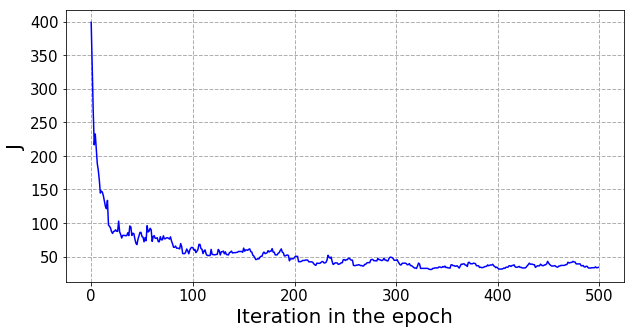

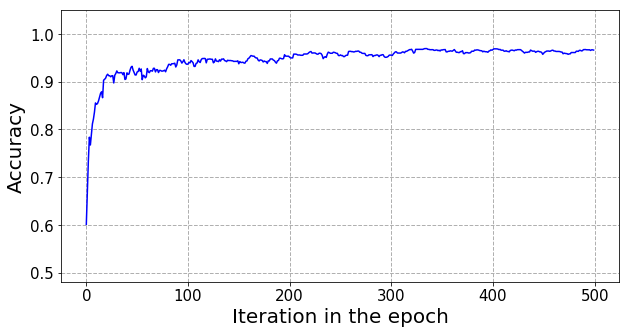

--- 1.0658767223358154 seconds ---


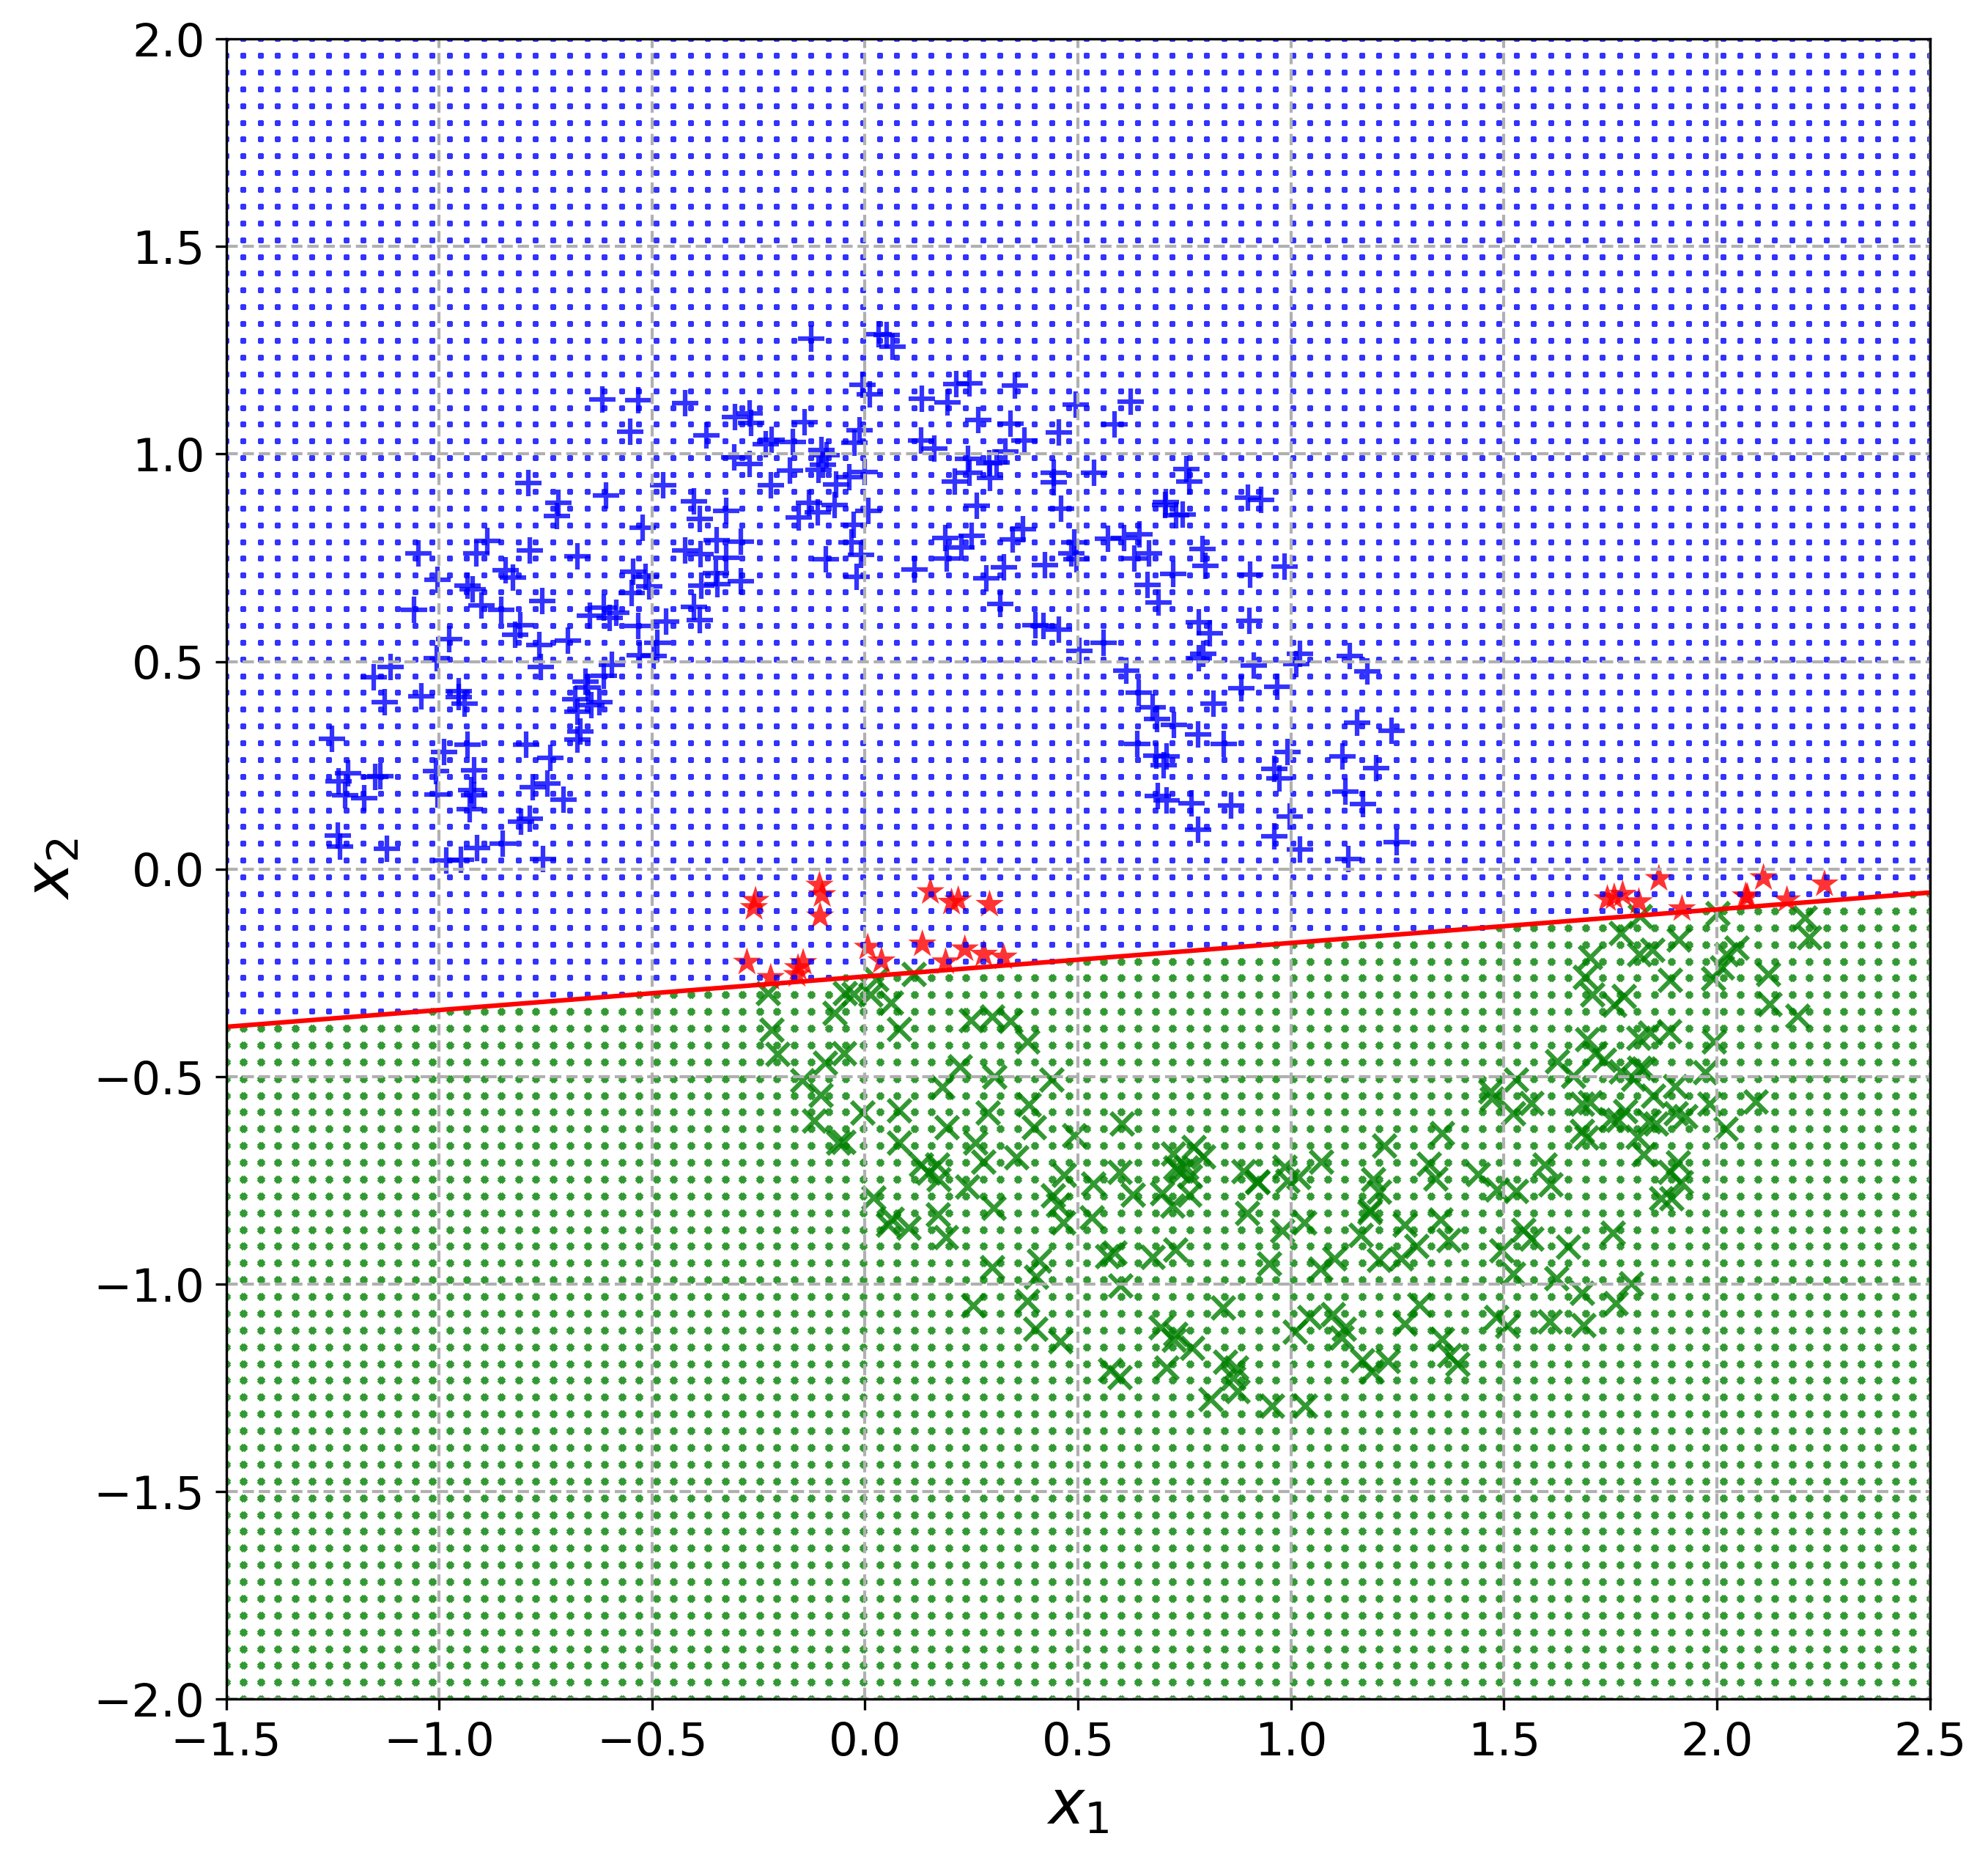

In [2]:
#p2_a

for name in dir():
    del globals()[name]
    
import numpy as np
import matplotlib.pyplot as plt
import time


def perceptron(x,w):
    m=x.shape[0]
    n=x.shape[1]
    x=x.T
    if n>w.size:
        x=x.T
      
    n=w.size
    w=np.reshape(w,(1,n))
    v=w@x
    v=np.reshape(v,(m,1))
    y=np.zeros((m,1))
    y[v<0]=-1
    y[v>0]=1
        
    return y

def doublemoon(N,d,r,w):
    ro1=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t1=np.random.uniform(low=0,high=np.pi,size=N//2)
    x1=ro1*np.cos(t1)
    y1=ro1*np.sin(t1)
    l1=np.ones((1,N//2))
    
    ro2=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t2=np.random.uniform(low=np.pi,high=2*np.pi,size=N//2)
    x2=ro2*np.cos(t2)+r
    y2=ro2*np.sin(t2)-d
    l2=-1*np.ones((1,N//2))
    
    E=np.vstack((x1,y1,l1,x2,y2,l2))
    return E

start_time=time.time()

#parameter definition
eta=.001
N=500
r=1
w=0.6
d=0.0

#iterating 30 times for a single epoch
J=np.zeros((30,N))
acc=np.zeros((30,N))
for k in np.arange(30):
    #generating different datasets for each iteration
    E=doublemoon(N,d,r,w)
    E=E.T
    E=np.vstack((E[:,0:3],E[:,3:6]))

    X=np.hstack((np.ones((E.shape[0],1)),E[:,0:2]))
    D=E[:,2,None]

    #initializing W vector
    W=np.zeros((1,X.shape[1]))

    #shuffling
    i=np.arange(N)
    np.random.shuffle(i)
    X=X[i,:]
    D=D[i,:]
    
    #epoch
    for i in np.arange(N):
        #updating W vector
        y=perceptron(X[None,i,:],W)
        e=D[i,:]-y
        W=W+eta*e*X[i,:]
        
        #measuring the cost with each updated W vector
        y=perceptron(X,W)
        J[k,i]=np.sum(0.5*(y-D)**2)
        ac=np.squeeze(np.equal(np.abs(D-y),np.zeros((y.shape[0],1))))*1
        acc[k,i]=np.sum(ac)/N

J=np.mean(J,axis=0)        
acc=np.mean(acc,axis=0)

fig1=plt.figure(figsize=[10,5])
plt.plot(np.arange(N),J,c="b")
plt.xlabel('Iteration in the epoch',fontsize=20)
plt.ylabel('J',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig1)
# fig1.savefig('p2_a1_-5.svg',format='svg')

fig3=plt.figure(figsize=[10,5])
plt.plot(np.arange(N),acc,c="b")
plt.xlabel('Iteration in the epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.ylim(np.min(acc)/1.25,1.05)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig3)
# fig3.savefig('p2_a2_-5.svg',format='svg')

print("--- %s seconds ---" % (time.time() - start_time))
#_______________________________________________________________________#
#p2_b

#printing the grid
nn=100
nodes1=np.linspace(-1.5,2.5,nn)
nodes2=np.linspace(-2.0,2.0,nn)
x1, x2 = np.meshgrid(nodes1, nodes2)
NodeTag=np.zeros((nn,nn))
crd=np.stack((x1,x2),axis=2)
crd=np.reshape(crd,(10000,2),order='C')
crd=np.hstack((np.ones((crd.shape[0],1)),crd))
y1=perceptron(crd,W)
i4=np.squeeze(np.equal(y1,np.ones((y1.shape[0],1))))
i5=np.squeeze(np.equal(y1,-1*np.ones((y1.shape[0],1))))
#hyper planes
x=np.linspace(-5,5,3)
y1=(W[0,0]+W[0,1]*x)/-W[0,2]
#indexing data according to lables
i1=np.squeeze(np.equal(y+D,2*np.ones((y.shape[0],1))))
i2=np.squeeze(np.equal(y+D,-2*np.ones((y.shape[0],1))))
i3=np.squeeze(np.equal(y+D,np.zeros((y.shape[0],1))))
#plotting
fig2=plt.figure(figsize=[10,10],dpi=300)
plt.scatter(X[i1,1], X[i1,2], alpha=0.8,marker='+', c='b', edgecolors='none', s=75)
plt.scatter(X[i2,1], X[i2,2], alpha=0.8,marker='x', c='g', edgecolors='none', s=55)
plt.scatter(X[i3,1], X[i3,2], alpha=0.8,marker='*', c='r', edgecolors='none', s=95)
plt.scatter(crd[i4,1], crd[i4,2], alpha=0.8,marker='+', c='b', edgecolors='none', s=3)
plt.scatter(crd[i5,1], crd[i5,2], alpha=0.8,marker='x', c='g', edgecolors='none', s=3)
plt.plot(x,y1,color='r')
plt.axis([-1.5,2.5,-2.0,2.0])
plt.grid('True',linestyle='--', linewidth=1)
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(fig2)
# fig2.savefig('p2_b_-5.svg',format='svg')


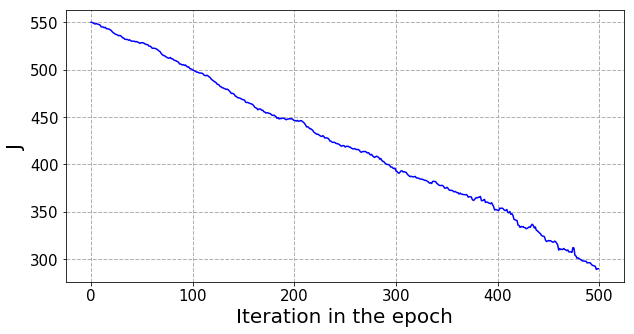

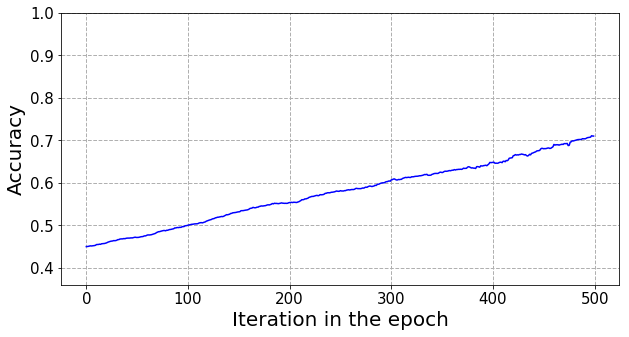

--- 0.9847750663757324 seconds ---


In [3]:
#p2_c

for name in dir():
    del globals()[name]
    
import numpy as np
import matplotlib.pyplot as plt
import time

def perceptron(x,w):
    m=x.shape[0]
    n=x.shape[1]
    x=x.T
    if n>w.size:
        x=x.T
      
    n=w.size
    w=np.reshape(w,(1,n))
    v=w@x
    v=np.reshape(v,(m,1))
    y=np.zeros((m,1))
    y[v<0]=-1
    y[v>0]=1
        
    return y

def doublemoon(N,d,r,w):
    ro1=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t1=np.random.uniform(low=0,high=np.pi,size=N//2)
    x1=ro1*np.cos(t1)
    y1=ro1*np.sin(t1)
    l1=np.ones((1,N//2))
    
    ro2=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t2=np.random.uniform(low=np.pi,high=2*np.pi,size=N//2)
    x2=ro2*np.cos(t2)+r
    y2=ro2*np.sin(t2)-d
    l2=-1*np.ones((1,N//2))
    
    E=np.vstack((x1,y1,l1,x2,y2,l2))
    return E

start_time=time.time()

#parameter definition
eta=.001
N=500
r=1
w=0.6
d=-0.5

#iterating 30 times for a single epoch
J=np.zeros((30,N))
acc=np.zeros((30,N))
for k in np.arange(30):
    #generating different datasets for each iteration
    E=doublemoon(N,d,r,w)
    E=E.T
    E=np.vstack((E[:,0:3],E[:,3:6]))

    X=np.hstack((np.ones((E.shape[0],1)),E[:,0:2]))
    D=E[:,2,None]

    #initializing W vector
    W=np.random.uniform(low=-0.5,high=0.5,size=X.shape[1])

    #shuffling
    i=np.arange(N)
    np.random.shuffle(i)
    X=X[i,:]
    D=D[i,:]
    
    #epoch
    for i in np.arange(N):
        #updating W vector
        y=perceptron(X[None,i,:],W)
        e=D[i,:]-y
        W=W+eta*e*X[i,:]
        
        #measuring the cost with each updated W vector
        y=perceptron(X,W)
        J[k,i]=np.sum(0.5*(y-D)**2)
        ac=np.squeeze(np.equal(np.abs(D-y),np.zeros((y.shape[0],1))))*1
        acc[k,i]=np.sum(ac)/N

J=np.mean(J,axis=0)        
acc=np.mean(acc,axis=0)

fig1=plt.figure(figsize=[10,5])
plt.plot(np.arange(N),J,c="b")
plt.xlabel('Iteration in the epoch',fontsize=20)
plt.ylabel('J',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig1)
# fig1.savefig('p2_c1_-5.svg',format='svg')

fig2=plt.figure(figsize=[10,5])
plt.plot(np.arange(N),acc,c="b")
plt.xlabel('Iteration in the epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.ylim(np.min(acc)/1.25,1.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig2)
# fig2.savefig('p2_c2_-5.svg',format='svg')

print("--- %s seconds ---" % (time.time() - start_time))

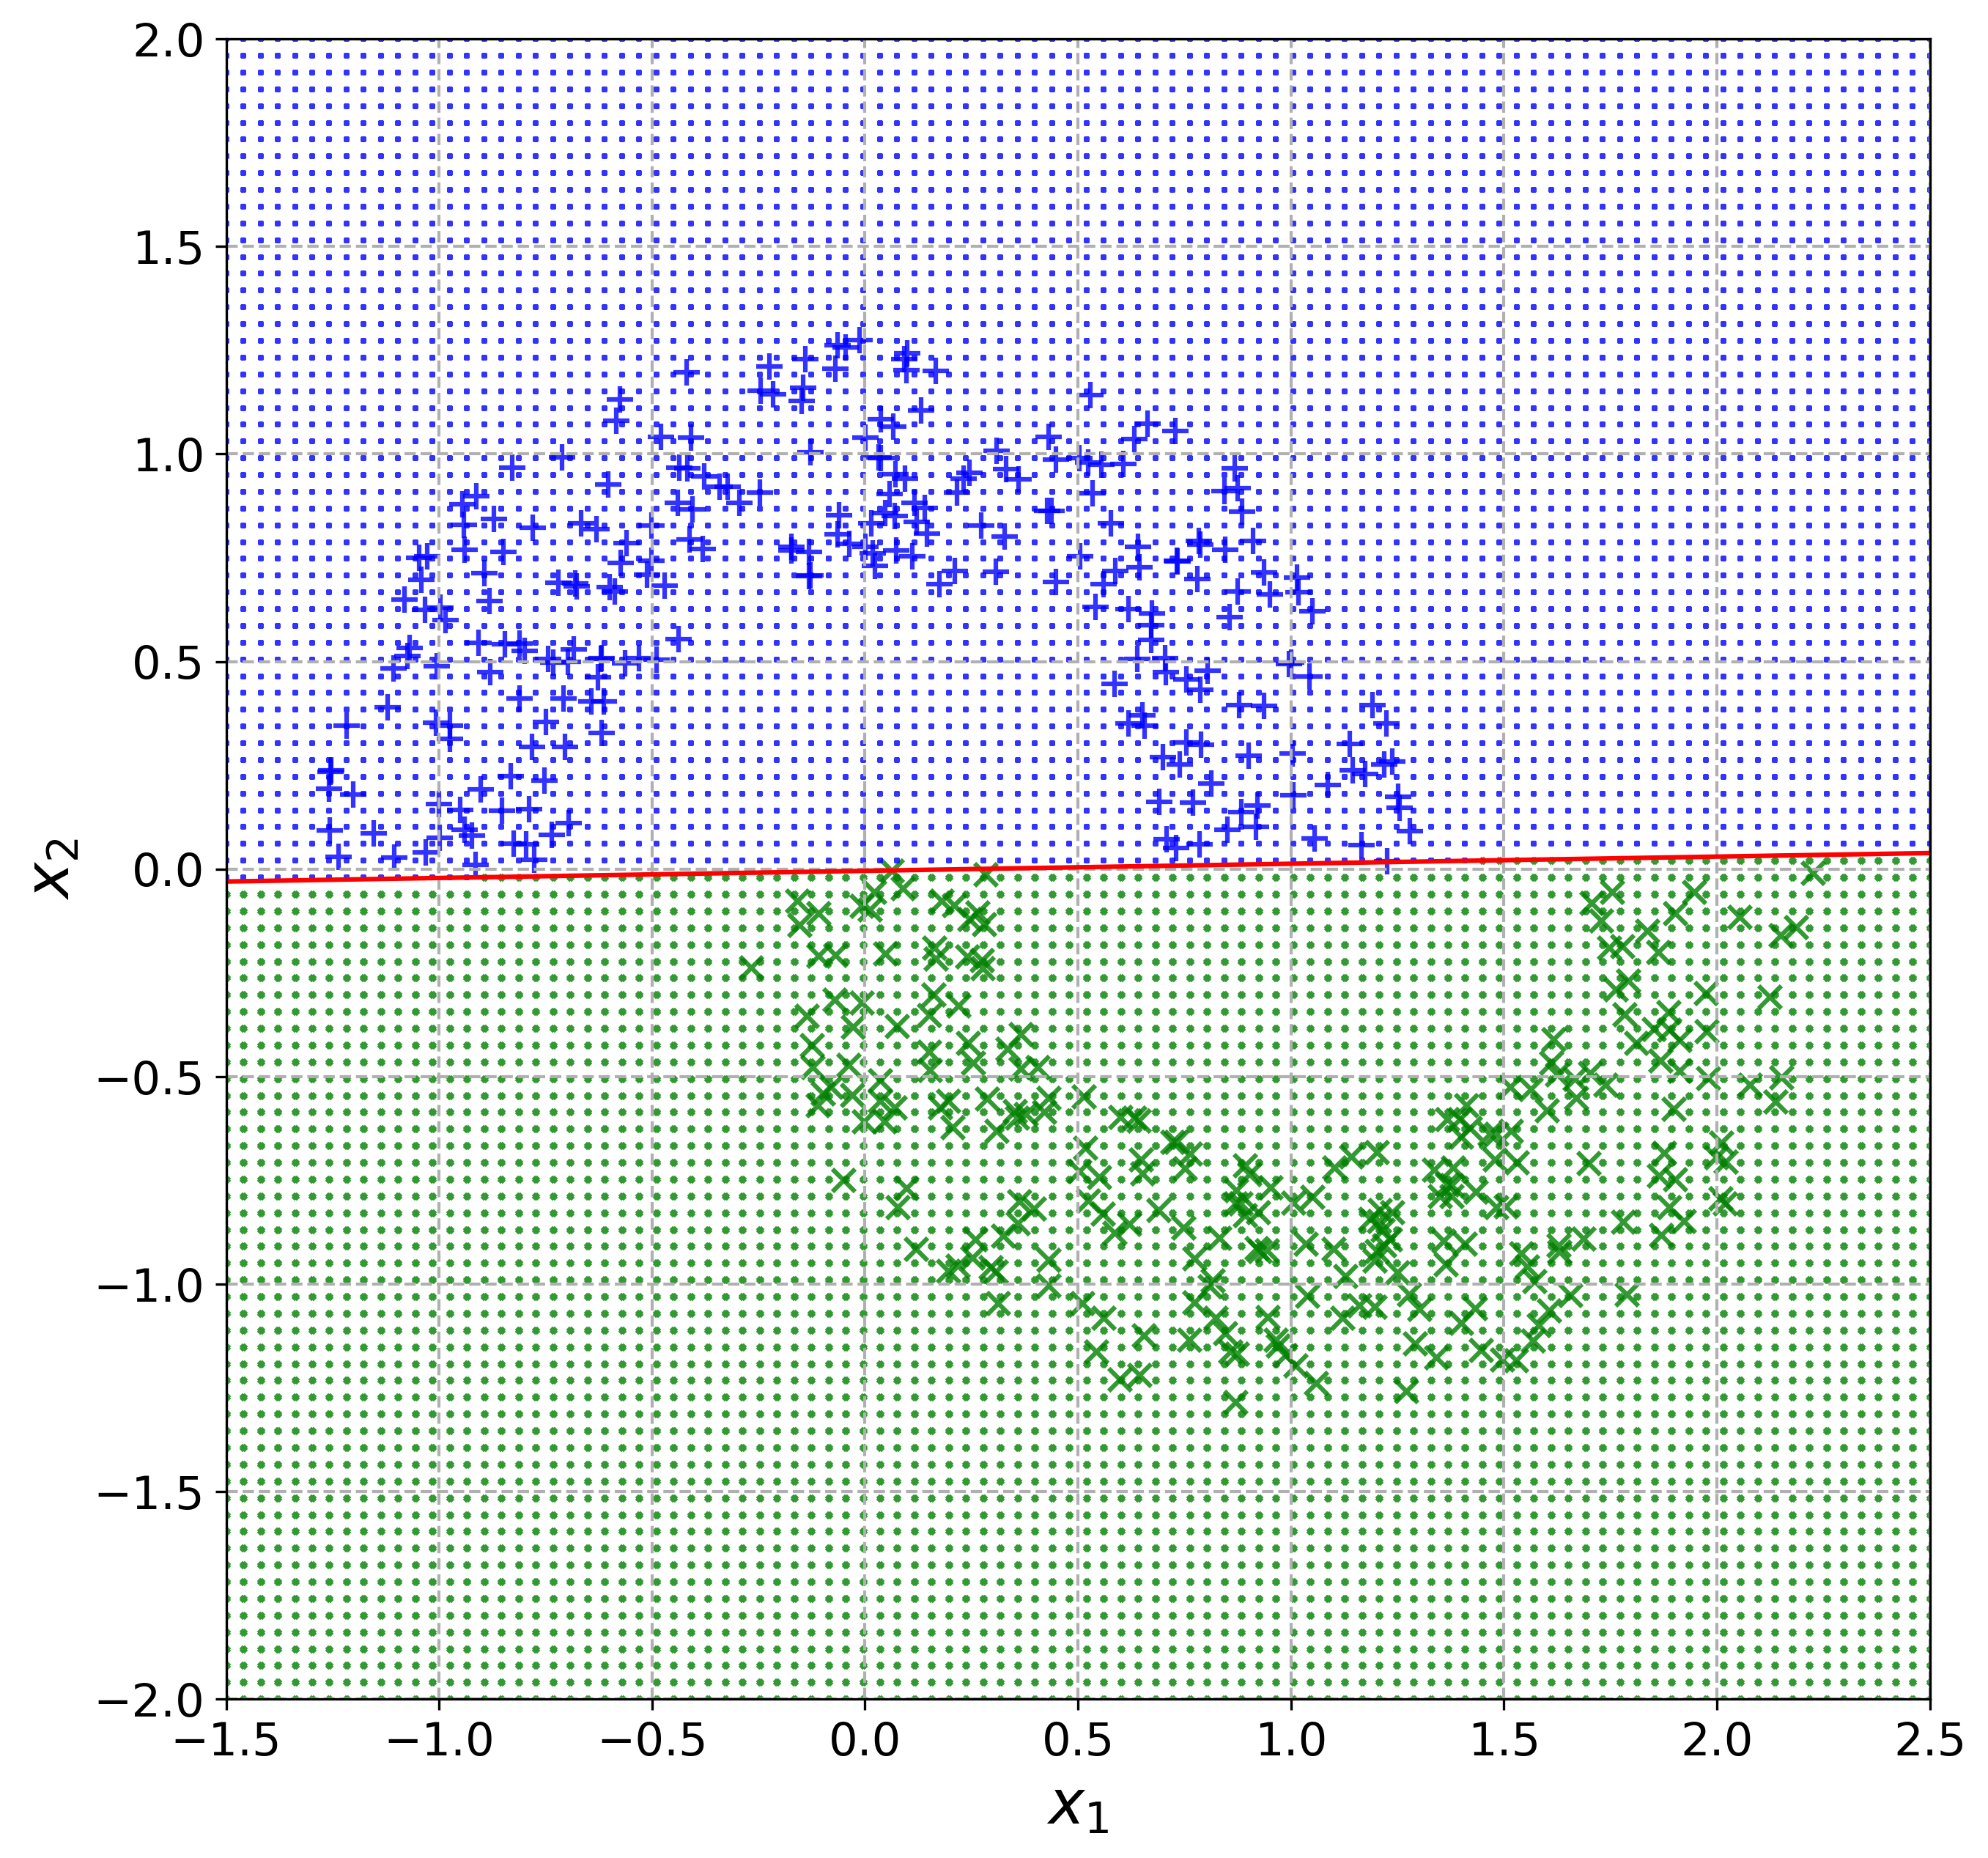

--- 1.094806432723999 seconds ---
[ 0.00154847 -0.0060447   0.35252516]


In [3]:
#p3_a

for name in dir():
    del globals()[name]
    
import numpy as np
import matplotlib.pyplot as plt
import time

def perceptron(x,w):
    m=x.shape[0]
    n=x.shape[1]
    x=x.T
    if n>w.size:
        x=x.T
      
    n=w.size
    w=np.reshape(w,(1,n))
    v=w@x
    v=np.reshape(v,(m,1))
    y=np.zeros((m,1))
    y[v<0]=-1
    y[v>0]=1
        
    return y

def doublemoon(N,d,r,w):
    ro1=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t1=np.random.uniform(low=0,high=np.pi,size=N//2)
    x1=ro1*np.cos(t1)
    y1=ro1*np.sin(t1)
    l1=np.ones((1,N//2))
    
    ro2=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t2=np.random.uniform(low=np.pi,high=2*np.pi,size=N//2)
    x2=ro2*np.cos(t2)+r
    y2=ro2*np.sin(t2)-d
    l2=-1*np.ones((1,N//2))
    
    E=np.vstack((x1,y1,l1,x2,y2,l2))
    return E

start_time=time.time()

#parameter definition
eta=0.001
N=500
r=1
w=0.6
d=0

#generating different datasets for each iteration
E=doublemoon(N,d,r,w)
E=E.T
E=np.vstack((E[:,0:3],E[:,3:6]))

X=np.hstack((np.ones((E.shape[0],1)),E[:,0:2]))
D=E[:,2,None]

#initializing W vector
W=np.random.uniform(low=-0.5,high=0.5,size=X.shape[1])

Iter=0
while Iter<500:
    y=perceptron(X,W)
    #finding misclassified data vectors
    i=np.squeeze(np.equal(np.abs(D-y),2*np.ones((y.shape[0],1))))
    #batch learning
    W += eta*np.sum(X[i,:]*D[i,:],axis=0)
    Iter+=1
    
#printing the grid
nn=100
nodes1=np.linspace(-1.5,2.5,nn)
nodes2=np.linspace(-2.0,2.0,nn)
x1, x2 = np.meshgrid(nodes1, nodes2)
NodeTag=np.zeros((nn,nn))
crd=np.stack((x1,x2),axis=2)
crd=np.reshape(crd,(10000,2),order='C')
crd=np.hstack((np.ones((crd.shape[0],1)),crd))
y1=perceptron(crd,W)
i4=np.squeeze(np.equal(y1,np.ones((y1.shape[0],1))))
i5=np.squeeze(np.equal(y1,-1*np.ones((y1.shape[0],1))))
#hyper planes
x=np.linspace(-5,5,3)
y1=(W[0]+W[1]*x)/-W[2]
#indexing data according to lables
i1=np.squeeze(np.equal(y+D,2*np.ones((y.shape[0],1))))
i2=np.squeeze(np.equal(y+D,-2*np.ones((y.shape[0],1))))
i3=np.squeeze(np.equal(y+D,np.zeros((y.shape[0],1))))
#plotting
fig2=plt.figure(figsize=[10,10],dpi=300)
plt.scatter(X[i1,1], X[i1,2], alpha=0.8,marker='+', c='b', edgecolors='none', s=75)
plt.scatter(X[i2,1], X[i2,2], alpha=0.8,marker='x', c='g', edgecolors='none', s=55)
plt.scatter(X[i3,1], X[i3,2], alpha=0.8,marker='*', c='r', edgecolors='none', s=95)
plt.scatter(crd[i4,1], crd[i4,2], alpha=0.8,marker='+', c='b', edgecolors='none', s=3)
plt.scatter(crd[i5,1], crd[i5,2], alpha=0.8,marker='x', c='g', edgecolors='none', s=3)
plt.plot(x,y1,color='r')
plt.axis([-1.5,2.5,-2.0,2.0])
plt.grid('True',linestyle='--', linewidth=1)
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(fig2)
# fig2.savefig('p3_a.svg',format='svg')

print("--- %s seconds ---" % (time.time() - start_time))
print(W)

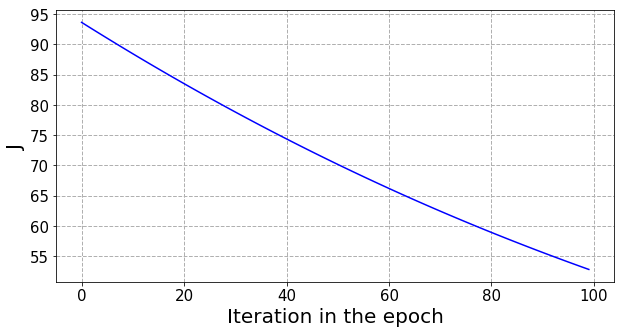

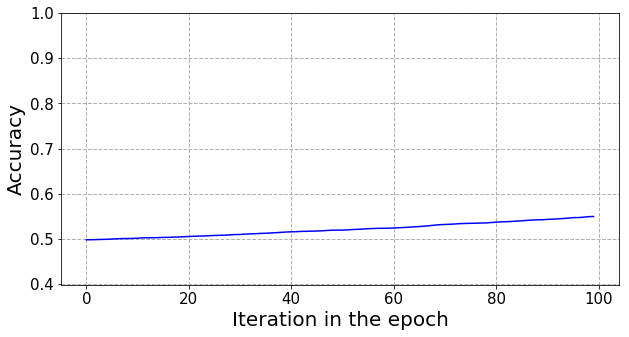

--- 0.5337481498718262 seconds ---


In [4]:
#p3_bcd

for name in dir():
    del globals()[name]
    
import numpy as np
import matplotlib.pyplot as plt
import time

def perceptron(x,w):
    m=x.shape[0]
    n=x.shape[1]
    x=x.T
    if n>w.size:
        x=x.T
      
    n=w.size
    w=np.reshape(w,(1,n))
    v=w@x
    v=np.reshape(v,(m,1))
    y=np.zeros((m,1))
    y[v<0]=-1
    y[v>0]=1
        
    return y

def doublemoon(N,d,r,w):
    ro1=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t1=np.random.uniform(low=0,high=np.pi,size=N//2)
    x1=ro1*np.cos(t1)
    y1=ro1*np.sin(t1)
    l1=np.ones((1,N//2))
    
    ro2=np.random.uniform(low=r-w/2,high=r+w/2,size=N//2)
    t2=np.random.uniform(low=np.pi,high=2*np.pi,size=N//2)
    x2=ro2*np.cos(t2)+r
    y2=ro2*np.sin(t2)-d
    l2=-1*np.ones((1,N//2))
    
    E=np.vstack((x1,y1,l1,x2,y2,l2))
    return E

start_time=time.time()

#parameter definition
eta=5e-6
N=500
r=1
w=0.6
d=-0.5
NumIter=100
NumSample=30

#generating different datasets for each iteration
E=doublemoon(N,d,r,w)
E=E.T
E=np.vstack((E[:,0:3],E[:,3:6]))

X=np.hstack((np.ones((E.shape[0],1)),E[:,0:2]))
D=E[:,2,None]

J=np.zeros((NumSample,NumIter))
acc=np.zeros((NumSample,NumIter))
for j in np.arange(NumSample):
    #initializing W vector
    W=np.random.uniform(low=-0.5,high=0.5,size=X.shape[1])

    Iter=0
    while Iter<NumIter:
        y=perceptron(X,W)
        #finding misclassified data vectors
        i=np.squeeze(np.equal(np.abs(D-y),2*np.ones((y.shape[0],1))))
        #batch learning
        W += eta*np.sum(X[i,:]*D[i,:],axis=0)
        ww=np.reshape(W,(1,np.size(W)))
        J[j,Iter]=np.sum((ww@X.T)**2)
        ac=np.squeeze(np.equal(np.abs(D-y),np.zeros((y.shape[0],1))))*1
        acc[j,Iter]=np.sum(ac)/N
        Iter+=1

J=np.mean(J,axis=0)        
acc=np.mean(acc,axis=0)
        
fig1=plt.figure(figsize=[10,5])
plt.plot(np.arange(NumIter),J,c="b")
plt.xlabel('Iteration in the epoch',fontsize=20)
plt.ylabel('J',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig1)
# fig1.savefig('p3_d1.svg',format='svg')

fig2=plt.figure(figsize=[10,5])
plt.plot(np.arange(NumIter),acc,c="b")
plt.xlabel('Iteration in the epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.ylim(np.min(acc)/1.25,1.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig2)
# fig2.savefig('p3_d2.svg',format='svg')

print("--- %s seconds ---" % (time.time() - start_time))

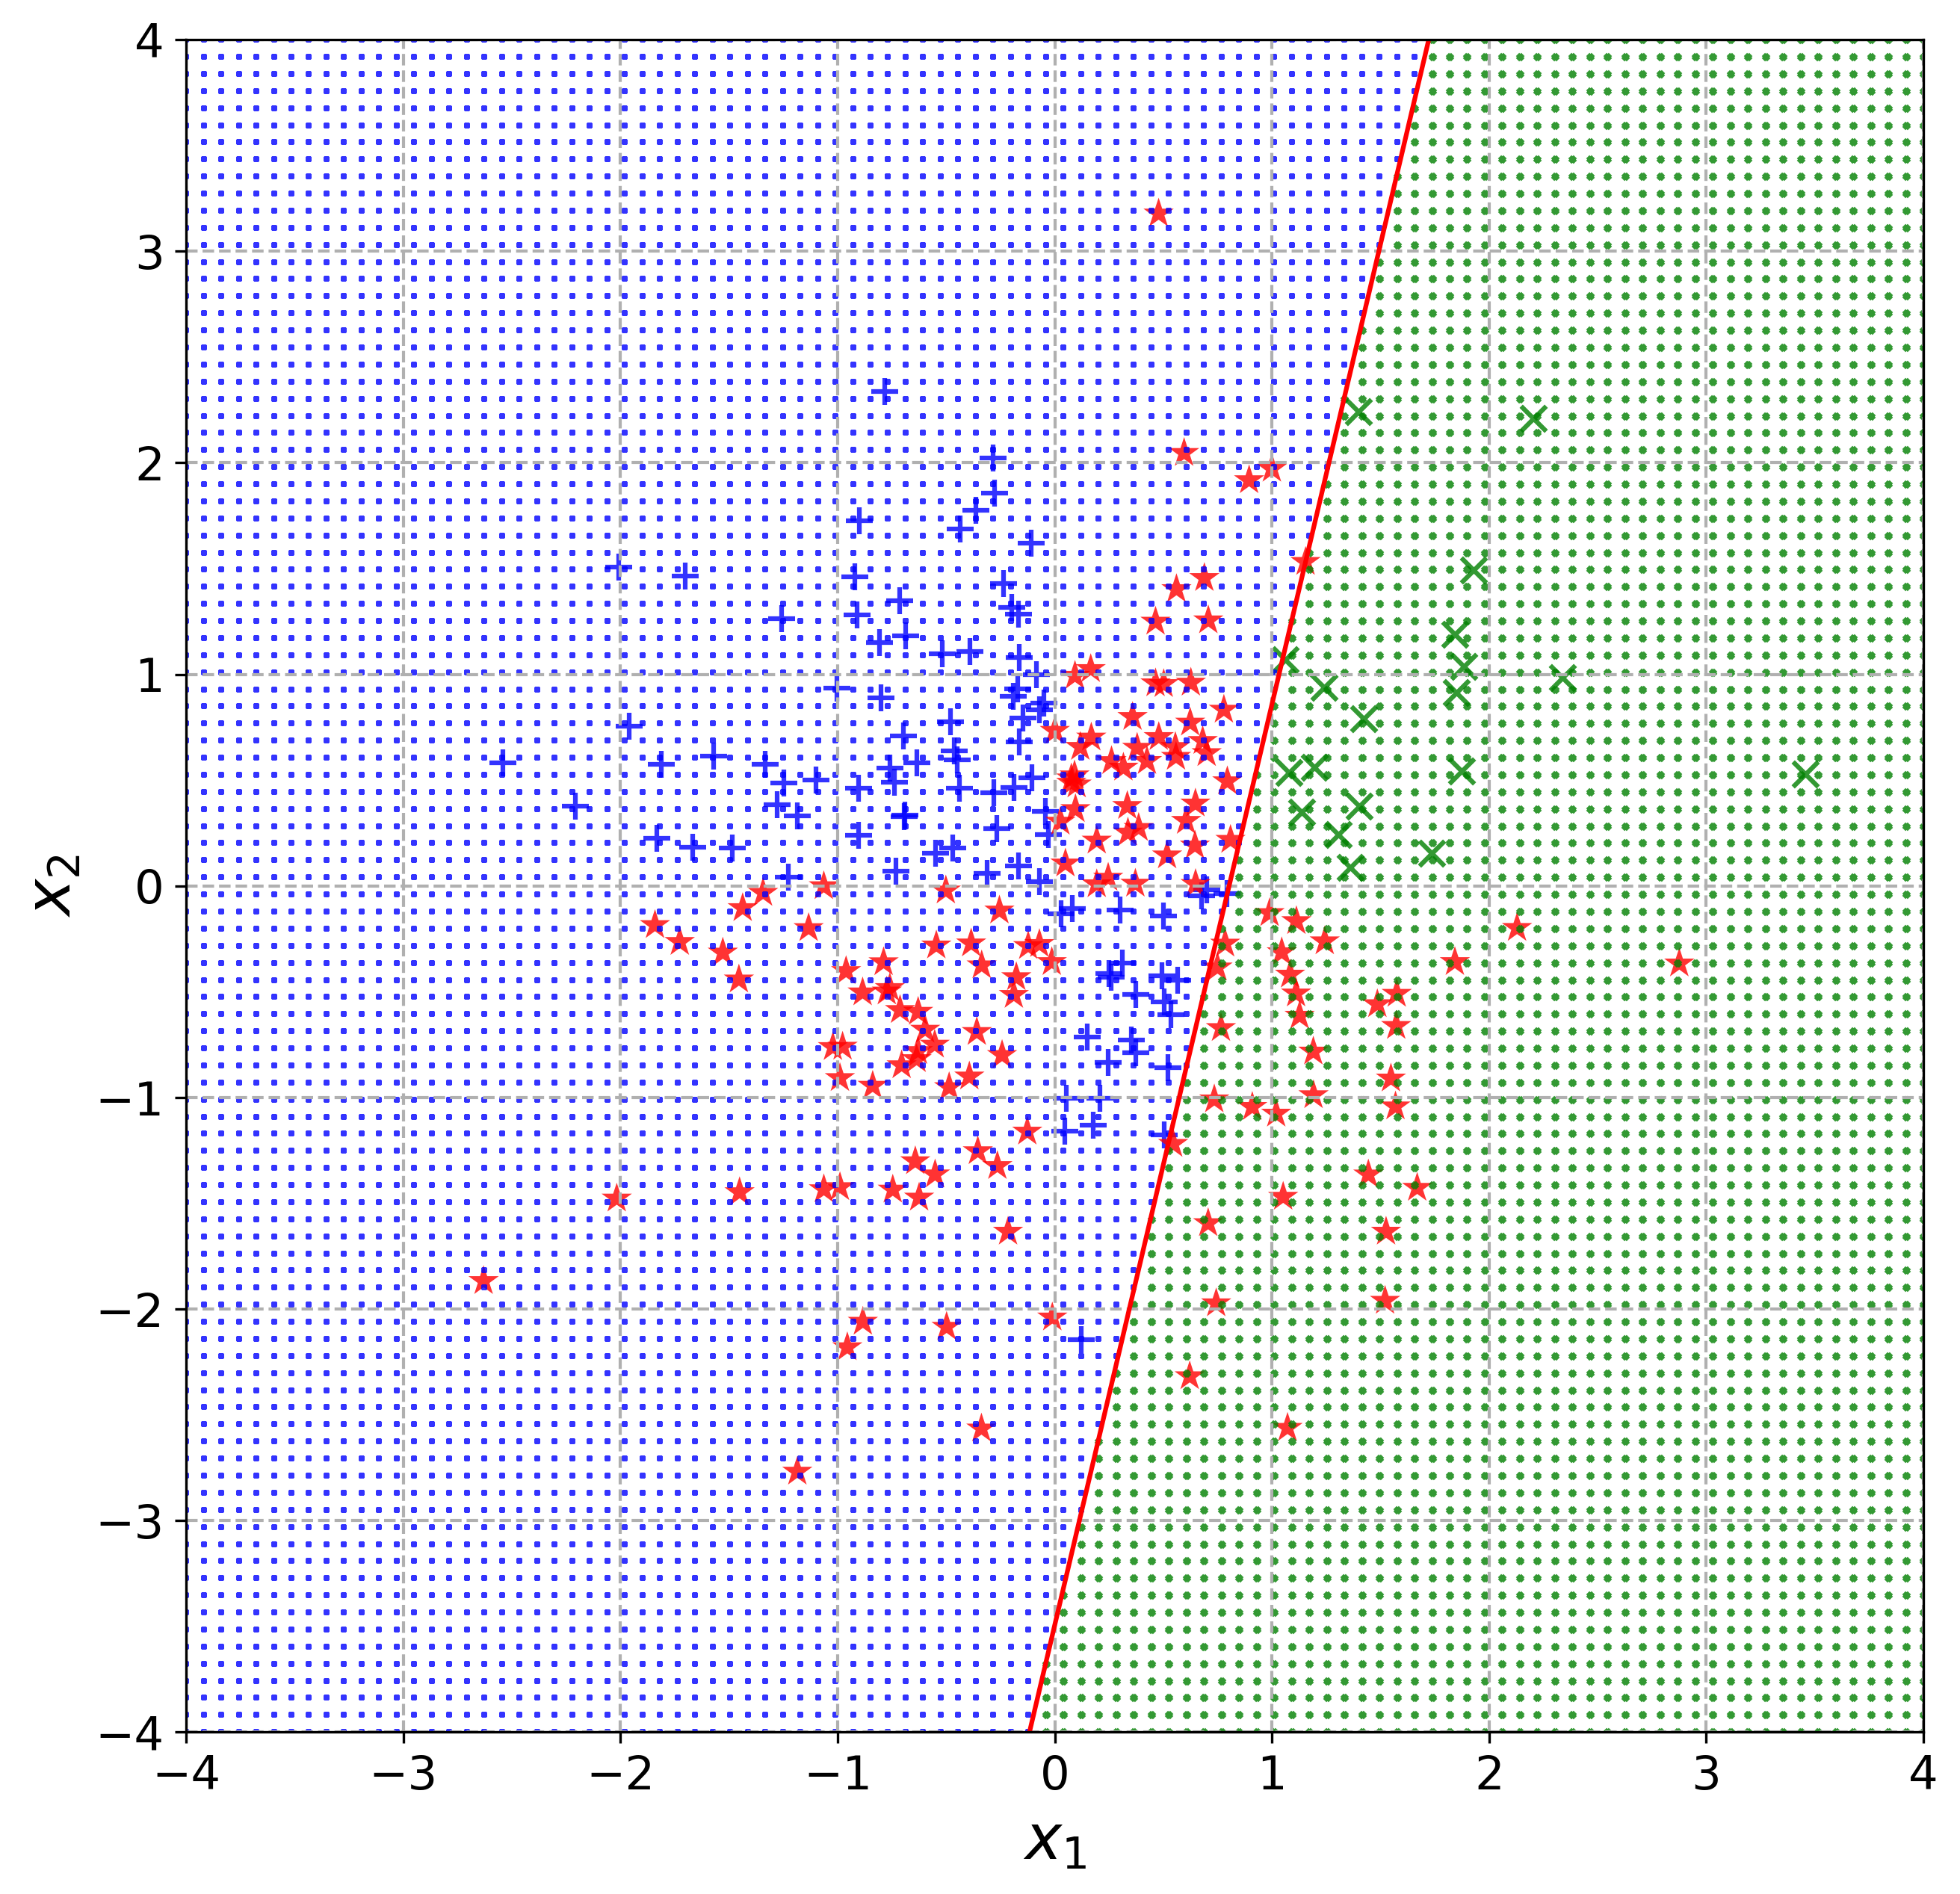

--- 1.0740675926208496 seconds ---
[ 0.24407385 -0.30404362  0.06986601]


In [5]:
#p3_e

for name in dir():
    del globals()[name]
    
import numpy as np
import matplotlib.pyplot as plt
import time

def perceptron(x,w):
    m=x.shape[0]
    n=x.shape[1]
    x=x.T
    if n>w.size:
        x=x.T
      
    n=w.size
    w=np.reshape(w,(1,n))
    v=w@x
    v=np.reshape(v,(m,1))
    y=np.zeros((m,1))
    y[v<0]=-1
    y[v>0]=1
        
    return y

def gaussX(N,v):
    E1=np.sqrt(v)*np.random.randn(2,N//2)
    E2=np.sqrt(v)*np.random.randn(2,N//2)
    i=E1[0,:]*E1[1,:]
    E1=E1[:,i<0]
    l1=np.ones((1,E1.shape[1]))
    E1=np.vstack((E1,l1))
    i=E2[0,:]*E2[1,:]
    E2=E2[:,i>0]
    l2=-1*np.ones((1,E2.shape[1]))
    E2=np.vstack((E2,l2))
    E=np.hstack((E1,E2))
    return E

start_time=time.time()

#parameter definition
eta=5e-6
N=500
v=1

#generating different datasets for each iteration
E=gaussX(N,v)
E=E.T

X=np.hstack((np.ones((E.shape[0],1)),E[:,0:2]))
D=E[:,2,None]

#initializing W vector
W=np.random.uniform(low=-0.5,high=0.5,size=X.shape[1])

Iter=0
while Iter<100:
    y=perceptron(X,W)
    #finding misclassified data vectors
    i=np.squeeze(np.equal(np.abs(D-y),2*np.ones((y.shape[0],1))))
    #batch learning
    W += eta*np.sum(X[i,:]*D[i,:],axis=0)
    Iter+=1
    
#printing the grid
nn=100
nodes=np.linspace(-4.0,4.0,nn)
x1, x2 = np.meshgrid(nodes, nodes)
NodeTag=np.zeros((nn,nn))
crd=np.stack((x1,x2),axis=2)
crd=np.reshape(crd,(10000,2),order='C')
crd=np.hstack((np.ones((crd.shape[0],1)),crd))
y1=perceptron(crd,W)
i4=np.squeeze(np.equal(y1,np.ones((y1.shape[0],1))))
i5=np.squeeze(np.equal(y1,-1*np.ones((y1.shape[0],1))))
#hyper planes
x=np.linspace(-5,5,3)
y1=(W[0]+W[1]*x)/-W[2]
#indexing data according to lables
i1=np.squeeze(np.equal(y+D,2*np.ones((y.shape[0],1))))
i2=np.squeeze(np.equal(y+D,-2*np.ones((y.shape[0],1))))
i3=np.squeeze(np.equal(y+D,np.zeros((y.shape[0],1))))
#plotting
fig2=plt.figure(figsize=[10,10],dpi=300)
plt.scatter(X[i1,1], X[i1,2], alpha=0.8,marker='+', c='b', edgecolors='none', s=75)
plt.scatter(X[i2,1], X[i2,2], alpha=0.8,marker='x', c='g', edgecolors='none', s=65)
plt.scatter(X[i3,1], X[i3,2], alpha=0.8,marker='*', c='r', edgecolors='none', s=105)
plt.scatter(crd[i4,1], crd[i4,2], alpha=0.8,marker='+', c='b', edgecolors='none', s=3)
plt.scatter(crd[i5,1], crd[i5,2], alpha=0.8,marker='x', c='g', edgecolors='none', s=3)
plt.plot(x,y1,color='r')
plt.axis([-4.0,4.0,-4.0,4.0])
plt.grid('True',linestyle='--', linewidth=1)
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(fig2)
# fig2.savefig('p3_e.svg',format='svg')

print("--- %s seconds ---" % (time.time() - start_time))
print(W)

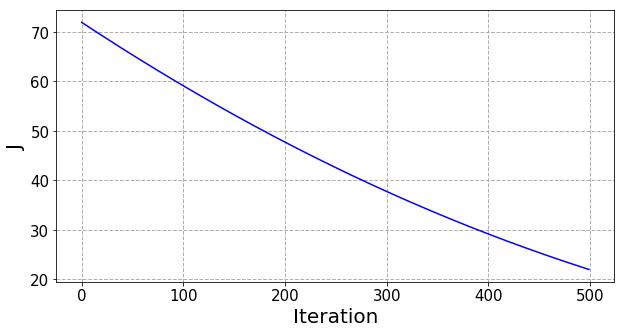

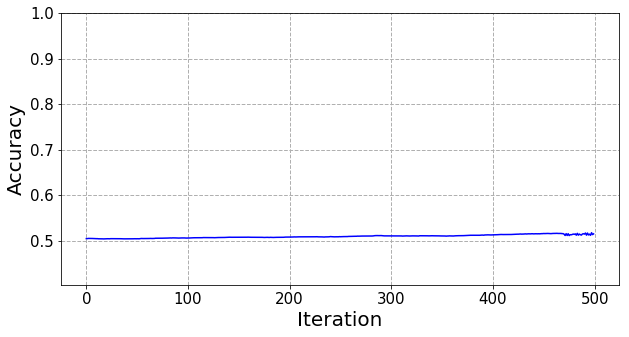

--- 1.4033050537109375 seconds ---


In [16]:
#p3_f

for name in dir():
    del globals()[name]
    
import numpy as np
import matplotlib.pyplot as plt
import time

def perceptron(x,w):
    m=x.shape[0]
    n=x.shape[1]
    x=x.T
    if n>w.size:
        x=x.T
      
    n=w.size
    w=np.reshape(w,(1,n))
    v=w@x
    v=np.reshape(v,(m,1))
    y=np.zeros((m,1))
    y[v<0]=-1
    y[v>0]=1
        
    return y

def gaussX(N,v):
    E1=np.sqrt(v)*np.random.randn(2,N//2)
    E2=np.sqrt(v)*np.random.randn(2,N//2)
    i=E1[0,:]*E1[1,:]
    E1=E1[:,i<0]
    l1=np.ones((1,E1.shape[1]))
    E1=np.vstack((E1,l1))
    i=E2[0,:]*E2[1,:]
    E2=E2[:,i>0]
    l2=-1*np.ones((1,E2.shape[1]))
    E2=np.vstack((E2,l2))
    E=np.hstack((E1,E2))
    return E

start_time=time.time()

#parameter definition
eta=5e-6
N=500
v=1
NumIter=500
NumSample=30

#generating different datasets for each iteration
E=gaussX(N,v)
E=E.T

X=np.hstack((np.ones((E.shape[0],1)),E[:,0:2]))
D=E[:,2,None]

J=np.zeros((NumSample,NumIter))
acc=np.zeros((NumSample,NumIter))
for j in np.arange(NumSample):
    #initializing W vector
    W=np.random.uniform(low=-0.5,high=0.5,size=X.shape[1])

    Iter=0
    while Iter<NumIter:
        y=perceptron(X,W)
        #finding misclassified data vectors
        i=np.squeeze(np.equal(np.abs(D-y),2*np.ones((y.shape[0],1))))
        #batch learning
        W += eta*np.sum(X[i,:]*D[i,:],axis=0)
        ww=np.reshape(W,(1,np.size(W)))
        J[j,Iter]=np.sum((ww@X.T)**2)
        ac=np.squeeze(np.equal(np.abs(D-y),np.zeros((y.shape[0],1))))*1
        acc[j,Iter]=np.sum(ac)/(N/2)
        Iter+=1

J=np.mean(J,axis=0)        
acc=np.mean(acc,axis=0)
        
fig1=plt.figure(figsize=[10,5])
plt.plot(np.arange(NumIter),J,c="b")
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('J',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig1)
# fig1.savefig('p3_f1.svg',format='svg')

fig2=plt.figure(figsize=[10,5])
plt.plot(np.arange(NumIter),acc,c="b")
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.ylim(np.min(acc)/1.25,1.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig2)
# fig2.savefig('p3_f2.svg',format='svg')

print("--- %s seconds ---" % (time.time() - start_time))

The optimum learning rate is:
[0.23704348 0.24165217 0.24626087 0.25086957 0.25547826]
number of iterations:
12


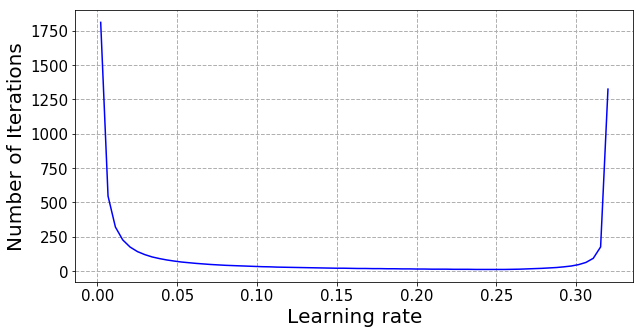

In [9]:
#p4_a

for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
case2= ''
case = bowl #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2)# define equation
elif(case==case2):
    #define other surfaces here
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)

wStar=np.array([0,0]) # ending point
lim=2000 # number of iterations
LR=np.linspace(0.002,0.32,70)# learning rates
Its=[]
Ew_thresh=1e-2

for i in np.arange(np.size(LR)):
    eta=LR[i]
    w=np.array([5,-5]) # starting point
    count= 0
    while(True):
        #compute gradient matrix and hessian matrix
        g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])

        wnew =  w-eta*g 
        #loop check
        if( count>lim ):
#             print('Count Break')
            break
        elif(np.isnan(g).any()):
#             print('nan break')
            break
        elif(np.linalg.norm(w-wStar)<Ew_thresh):
#             print('Threshold break')
            break
        else:
            count=count +1
            wprev=w.copy()

            w=wnew.copy()
    Its.append(count)

print('The optimum learning rate is:')
print(LR[Its==np.min(Its)])
print('number of iterations:')
print(np.min(Its))
    
fig1=plt.figure(figsize=[10,5])
plt.plot(LR,Its,c="b")
plt.xlabel('Learning rate',fontsize=20)
plt.ylabel('Number of Iterations',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig1)
# fig1.savefig('p4_a.svg',format='svg')

The optimum learning rate is:
[0.23243478]
number of iterations:
9.6


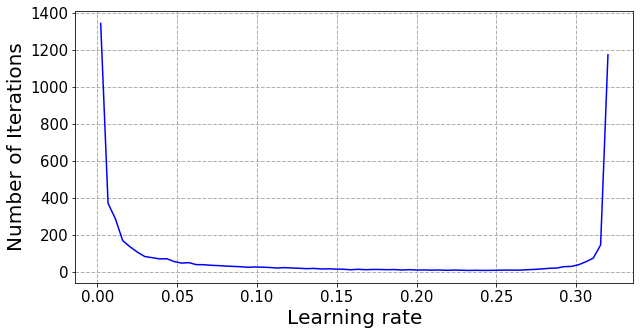

In [8]:
#p4_b

for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
case2= ''
case = bowl #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2)# define equation
elif(case==case2):
    #define other surfaces here
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)

wStar=np.array([0,0]) # ending point
lim=2000 # number of iterations
LR=np.linspace(0.002,0.32,70)# learning rates
Its=[]
Ew_thresh=1e-2
sigma=3
mu=0
NumIter=10

for i in np.arange(np.size(LR)):
    eta=LR[i]
    counts=0
    for k in np.arange(NumIter):
        w=sigma*np.random.randn(2)+mu # starting point
        count= 0
        while(True):
            #compute gradient matrix and hessian matrix
            g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])

            wnew =  w-eta*g 
            #loop check
            if( count>lim ):
    #             print('Count Break')
                break
            elif(np.isnan(g).any()):
    #             print('nan break')
                break
            elif(np.linalg.norm(w-wStar)<Ew_thresh):
    #             print('Threshold break')
                break
            else:
                count=count +1
                wprev=w.copy()

                w=wnew.copy()
        counts+=count
    Its.append(counts/NumIter)

print('The optimum learning rate is:')
print(LR[Its==np.min(Its)])
print('number of iterations:')
print(np.min(Its))

fig1=plt.figure(figsize=[10,5])
plt.plot(LR,Its,c="b")
plt.xlabel('Learning rate',fontsize=20)
plt.ylabel('Number of Iterations',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig1)
# fig1.savefig('p4_b.svg',format='svg')

The optimum learning rate is:
[0.23563265]
number of iterations:
5.4


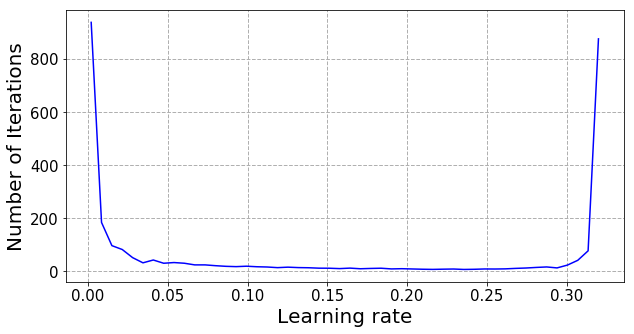

In [10]:
#p4_c

for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
case2= ''
case = bowl #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2)# define equation
elif(case==case2):
    #define other surfaces here
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)

wStar=np.array([0,0]) # ending point
lim=2000 # number of iterations
LR=np.linspace(0.002,0.32,50)# learning rates
# LR=np.array([0.001,0.003,0.01,0.03,0.1,0.3,1])# learning rates
Its=[]
jw_thresh=1e-2
sigma=3
mu=0
NumIter=5

for i in np.arange(np.size(LR)):
    eta=LR[i]
    counts=0
    for k in np.arange(NumIter):
        w=sigma*np.random.randn(2)+mu # starting point
        count= 0
        while(True):
            #compute gradient matrix and hessian matrix
            g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])

            wnew =  w-eta*g 
            #loop check
            if( count>lim ):
#                 print('Count Break')
                break
            elif(np.isnan(g).any()):
#                 print('nan break')
                break
            elif(j.subs({w1:w[0],w2:w[1]})<jw_thresh):
#                 print('Threshold break')
                break
            else:
                count=count +1
                wprev=w.copy()

                w=wnew.copy()
        counts+=count
    Its.append(counts/NumIter)

print('The optimum learning rate is:')
print(LR[Its==np.min(Its)])
print('number of iterations:')
print(np.min(Its))

fig1=plt.figure(figsize=[10,5])
plt.plot(LR,Its,c="b")
plt.xlabel('Learning rate',fontsize=20)
plt.ylabel('Number of Iterations',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig1)
# fig1.savefig('p4_c.svg',format='svg')

threshold break


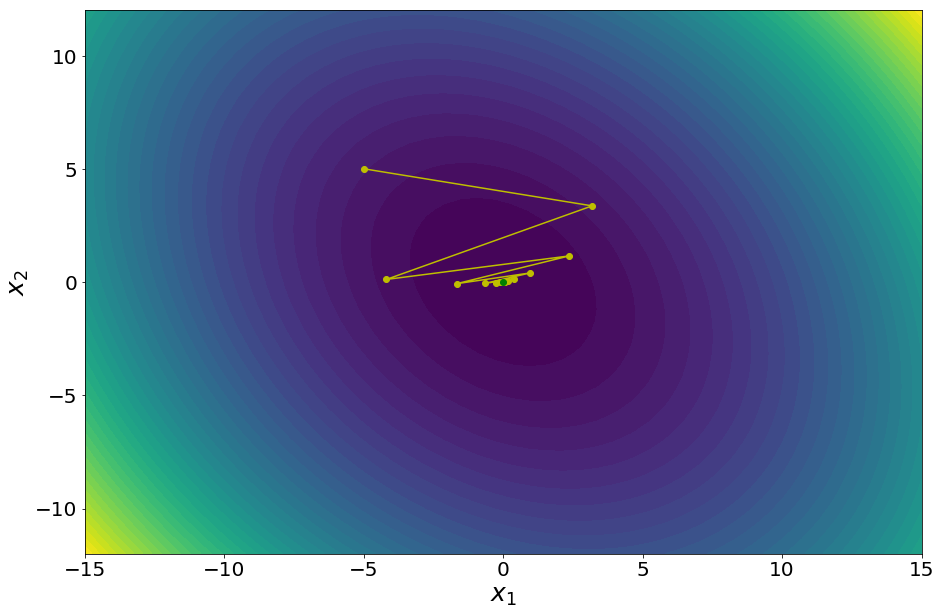

In [13]:
#p4_d

for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

HX ,HY  = 50,50 #number of x,y  points for countour
xmin,xmax = -15,15
ymin,ymax = -12,12
x1 = np.linspace(xmin,xmax,HX)
x2 = np.linspace(ymin,ymax,HY)
X1,X2 = np.meshgrid(x1,x2) # genertate mesh grid
w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
case2= ''
case = bowl #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2)# define equation
elif(case==case2):
    #define other surfaces here
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)

#generate contour map
ConMap=np.zeros((HX,HY))
for i in range(HX):
    for k in range(HY):
        ConMap[i,k]=j.subs({w1:x1[i],w2:x2[k]})


w=np.array([5,-5]) # starting point
wStar=[0,0] # ending point
ew=[]
jw=[]
lim=500 # number of iterations
count= 0 
line=[]
Ew_thresh=1e-2 #define threshold
beta=0.80

while(True):
    #compute gradient matrix and hessian matrix
    g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])
    
    eta = 1.0 # Initializing learning rate
    #linesearch modification for eta
    while j.subs({w1:w[0]-eta*g[0],w2:w[1]-eta*g[1]})>j.subs({w1:w[0],w2:w[1]}):
        eta=beta*eta
    
    wnew =  w-eta*g 
    #loop check
    if( count>lim ):
        print('Count Break')
        break
    elif(np.isnan(g).any()):
        print('nan break')
        break
    elif(np.linalg.norm(w-wStar)<Ew_thresh):
        print('threshold break')
        break
    else:
        count=count +1
        wprev=w.copy()
        
        line.append(w)
        w=wnew.copy()
        
        ew.append(np.linalg.norm(w-wStar))
        jw.append(j.subs({w1:w[0],w2:w[1]}))
line=np.array(line)   

fig=plt.figure(figsize=(15,10))
plt.contourf(X1,X2,ConMap,50,cmap='viridis', linewidths=3,linestyles='solid')
plt.plot(line[:,1],line[:,0],color='y')
plt.scatter(line[:,1],line[:,0],color='y')
plt.plot(wStar[1],wStar[0],'go')
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show(fig)
# fig.savefig('p4_d.svg',format='svg')

Count Break


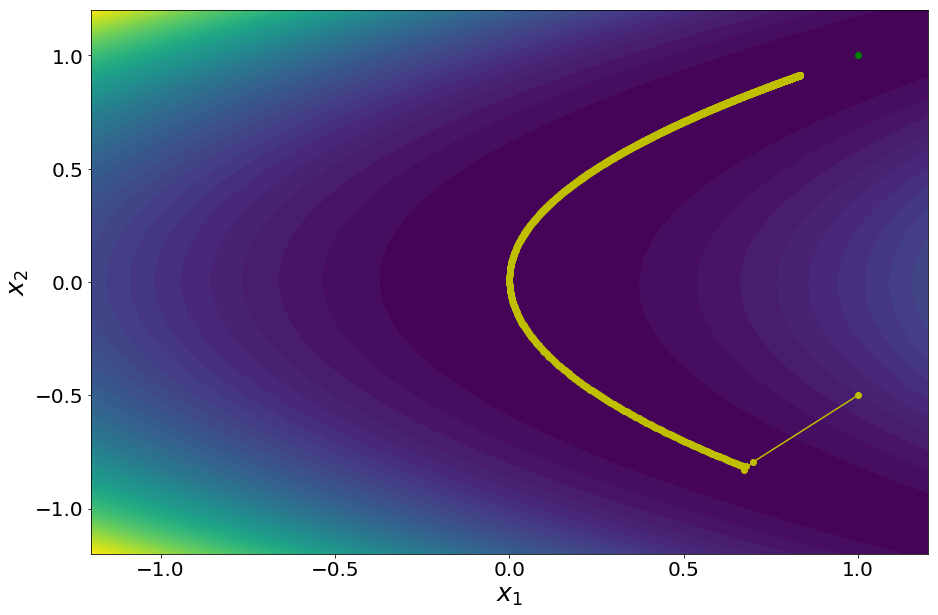

In [14]:
# p5_a

for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

HX ,HY  = 50,50 #number of x,y  points for countour
xmin,xmax = -1.2,1.2
ymin,ymax = -1.2,1.2
x1 = np.linspace(xmin,xmax,HX)
x2 = np.linspace(ymin,ymax,HY)
X1,X2 = np.meshgrid(x1,x2) # genertate mesh grid
w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
Rosenbrock= 'Rosenbrock'
case = Rosenbrock #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2)# define equation
elif(case==Rosenbrock):
    j=(1-w1)**2+100*(w2-w1**2)**2# define equation
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)

#generate contour map
ConMap=np.zeros((HX,HY))
for i in range(HX):
    for k in range(HY):
        ConMap[i,k]=j.subs({w1:x1[i],w2:x2[k]})


w=np.array([-0.5,1]) # starting point
wStar=[1,1] # ending point
ew=[]
jw=[]
eta = 0.002 # learning rate
lim=2000 # number of iterations
count= 0 
line=[]
Ew_thresh=1e-2 #define threshold

while(True):
    #compute gradient matrix and hessian matrix
    g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])
    
    wnew =  w-eta*g 
    #loop check
    if( count>lim ):
        print('Count Break')
        break
    elif(np.isnan(g).any()):
        print('nan break')
        break
    elif(np.linalg.norm(w-wStar)<Ew_thresh):
        print('threshold break')
        break
    else:
        count=count +1
        wprev=w.copy()
        
        line.append(w)
        w=wnew.copy()
        
        ew.append(np.linalg.norm(w-wStar))
        jw.append(j.subs({w1:w[0],w2:w[1]}))
line=np.array(line)   

fig=plt.figure(figsize=(15,10))
plt.contourf(X1,X2,ConMap,50,cmap='viridis', linewidths=3,linestyles='solid')
plt.plot(line[:,1],line[:,0],color='y')
plt.scatter(line[:,1],line[:,0],color='y')
plt.plot(wStar[1],wStar[0],'go')
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show(fig)
# fig.savefig('p5_a2.svg',format='svg')


Count Break


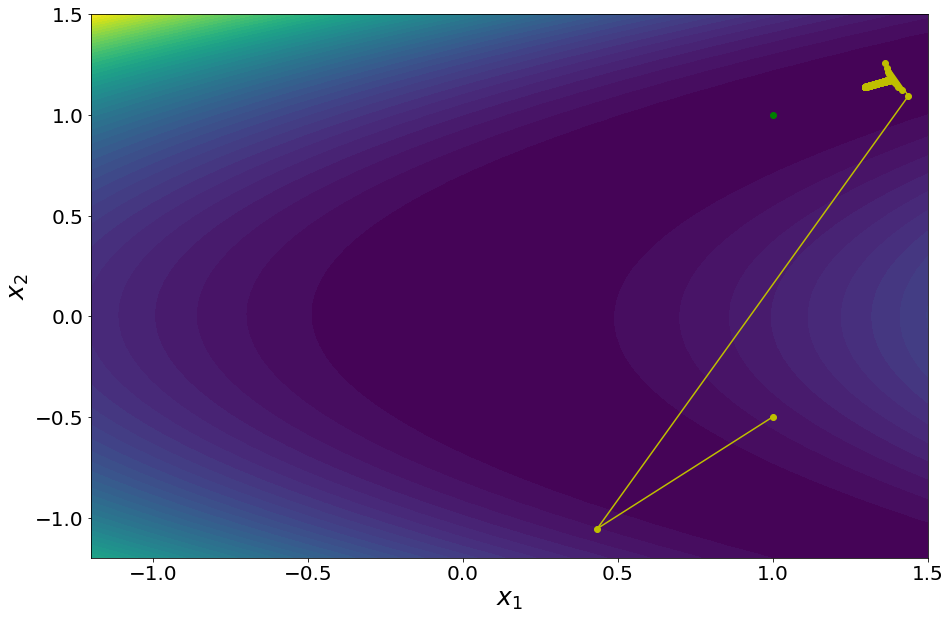

In [15]:
#p5_b

for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

HX ,HY  = 50,50 #number of x,y  points for countour
xmin,xmax = -1.2,1.5
ymin,ymax = -1.2,1.5
x1 = np.linspace(xmin,xmax,HX)
x2 = np.linspace(ymin,ymax,HY)
X1,X2 = np.meshgrid(x1,x2) # genertate mesh grid
w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
Rosenbrock= 'Rosenbrock'
case = Rosenbrock #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2) # define equation
elif(case==Rosenbrock):
    j=(1-w1)**2+100*(w2-w1**2)**2 # define equation
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)

#generate contour map
ConMap=np.zeros((HX,HY))
for i in range(HX):
    for k in range(HY):
        ConMap[i,k]=j.subs({w1:x1[i],w2:x2[k]})


w=np.array([-0.5,1]) # starting point
wStar=[1,1] # ending point
ew=[]
jw=[]
# eta = 1 # Initializing learning rate
lim=500 # number of iterations
count= 0 
line=[]
Ew_thresh=1e-2 #define threshold
beta=0.80

while(True):
    #compute gradient matrix and hessian matrix
    g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])
    
    eta = 1.0 # Initializing learning rate
    #linesearch modification for eta
    while j.subs({w1:w[0]-eta*g[0],w2:w[1]-eta*g[1]})>j.subs({w1:w[0],w2:w[1]}):
        eta=beta*eta
    
    wnew =  w-eta*g 
    #loop check
    if( count>lim ):
        print('Count Break')
        break
    elif(np.isnan(g).any()):
        print('nan break')
        break
    elif(np.linalg.norm(w-wStar)<Ew_thresh):
        print('threshold break')
        break
    else:
        count=count +1
        wprev=w.copy()
        
        line.append(w)
        w=wnew.copy()
        
        ew.append(np.linalg.norm(w-wStar))
        jw.append(j.subs({w1:w[0],w2:w[1]}))
line=np.array(line)   

fig=plt.figure(figsize=(15,10))
plt.contourf(X1,X2,ConMap,50,cmap='viridis', linewidths=3,linestyles='solid')
plt.plot(line[:,1],line[:,0],color='y')
plt.scatter(line[:,1],line[:,0],color='y')
plt.plot(wStar[1],wStar[0],'go')
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show(fig)
# fig.savefig('p5_b.svg',format='svg')

threshold break


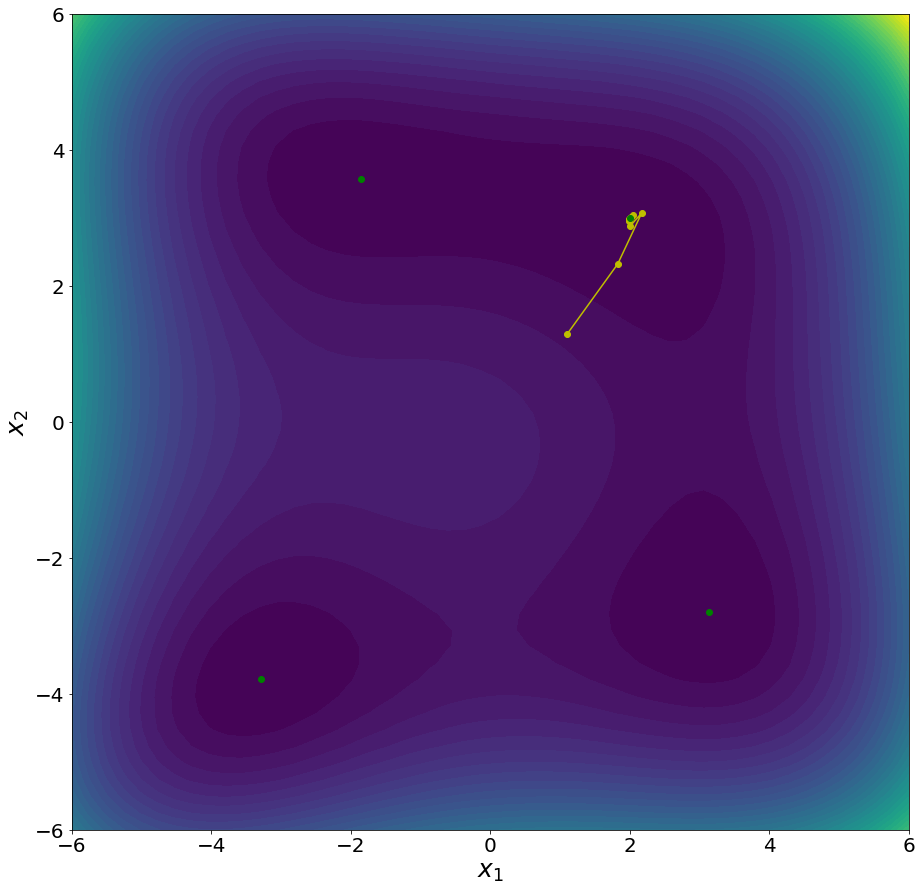

In [16]:
#p6_a

for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

HX ,HY  = 50,50 #number of x,y  points for countour
xmin,xmax = -6.0,6.0
ymin,ymax = -6.0,6.0
x1 = np.linspace(xmin,xmax,HX)
x2 = np.linspace(ymin,ymax,HY)
X1,X2 = np.meshgrid(x1,x2) # genertate mesh grid
w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
Rosenbrock= 'Rosenbrock'
Himmelblau= 'Himmelblau'
case = Himmelblau #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2) # define equation
elif(case==Rosenbrock):
    j=(1-w1)**2+100*(w2-w1**2)**2 # define equation
    pass
elif(case==Himmelblau):
    j=(w1**2+w2-11)**2+(w1+w2**2-7)**2 # define equation
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)

#generate contour map
ConMap=np.zeros((HX,HY))
for i in range(HX):
    for k in range(HY):
        ConMap[i,k]=j.subs({w1:x1[i],w2:x2[k]})


w=1*np.random.randn(2)+0 # starting point
wStar1=[3,2] # ending point
wStar2=[-2.8,3.13] # ending point
wStar3=[-3.78,-3.28] # ending point
wStar4=[3.58,-1.85] # ending point
ew=[]
jw=[]
# eta = 1 # Initializing learning rate
lim=500 # number of iterations
count= 0 
line=[]
Ew_thresh=1e-2 #define threshold
eta = 0.02 # Initializing learning rate

while(True):
    #compute gradient matrix and hessian matrix
    g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])
    
    wnew =  w-eta*g 
    #loop check
    if( count>lim ):
        print('Count Break')
        break
    elif(np.isnan(g).any()):
        print('nan break')
        break
    elif(np.linalg.norm(w-wStar1)<Ew_thresh) or (np.linalg.norm(w-wStar2)<Ew_thresh) or (np.linalg.norm(w-wStar3)<Ew_thresh) or (np.linalg.norm(w-wStar4)<Ew_thresh):
        print('threshold break')
        break
    else:
        count=count +1
        wprev=w.copy()
        
        line.append(w)
        w=wnew.copy()
        
        jw.append(j.subs({w1:w[0],w2:w[1]}))
line=np.array(line)   

fig=plt.figure(figsize=(15,15))
plt.contourf(X1,X2,ConMap,50,cmap='viridis', linewidths=3,linestyles='solid')
plt.plot(line[:,1],line[:,0],color='y')
plt.scatter(line[:,1],line[:,0],color='y')
plt.plot(wStar1[1],wStar1[0],'go')
plt.plot(wStar2[1],wStar2[0],'go')
plt.plot(wStar3[1],wStar3[0],'go')
plt.plot(wStar4[1],wStar4[0],'go')
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show(fig)
# fig.savefig('p6_b.svg',format='svg')

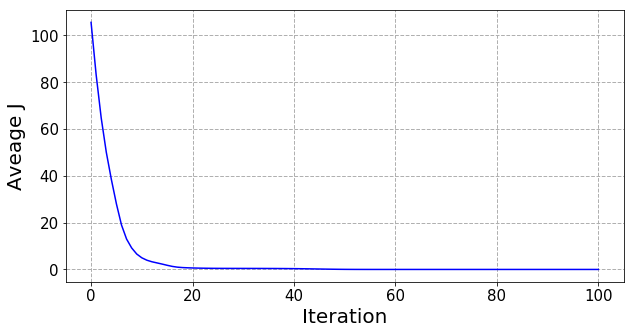

In [17]:
#p6_b

for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')

bowl = 'bowl'
Rosenbrock= 'Rosenbrock'
Himmelblau= 'Himmelblau'
case = Himmelblau #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2) # define equation
elif(case==Rosenbrock):
    j=(1-w1)**2+100*(w2-w1**2)**2 # define equation
    pass
elif(case==Himmelblau):
    j=(w1**2+w2-11)**2+(w1+w2**2-7)**2 # define equation
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)

wStar1=[3,2] # ending point
wStar2=[-2.8,3.13] # ending point
wStar3=[-3.78,-3.28] # ending point
wStar4=[3.58,-1.85] # ending point
lim=100 # number of iterations
eta=0.01 # learning rates
sigma=1
mu=0
NumIter=30
J=np.zeros((NumIter,lim+1))


for k in np.arange(NumIter):
    count=0
#     w=np.array([5,-5]) # starting point
    w=sigma*np.random.randn(2)+mu # starting point
    jw=[]
    while(True):
        #compute gradient matrix and hessian matrix
        g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])

        wnew =  w-eta*g 
        #loop check
        if( count>lim ):
#             print('Count Break')
            break
        elif(np.isnan(g).any()):
#             print('nan break')
            break
        else:
            count=count +1
            wprev=w.copy()

            w=wnew.copy()
            jw.append(j.subs({w1:w[0],w2:w[1]}))
    J[k,:]=jw
J=np.mean(J,axis=0)

fig1=plt.figure(figsize=[10,5])
plt.plot(np.arange(lim+1),J,c="b")
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Aveage J',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig1)
# fig1.savefig('p6_b.svg',format='svg')

<string>:63: RuntimeWarning: invalid value encountered in subtract


The optimum learning rate is:
[0.83020408]
number of iterations:
6.1


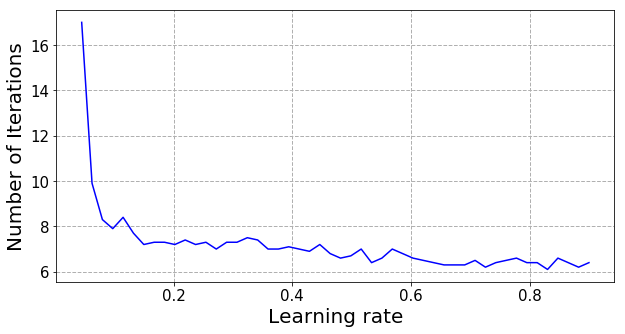

In [18]:
#p6_c

for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

HX ,HY  = 50,50 #number of x,y  points for countour
xmin,xmax = -15,15
ymin,ymax = -12,12
x1 = np.linspace(xmin,xmax,HX)
x2 = np.linspace(ymin,ymax,HY)
X1,X2 = np.meshgrid(x1,x2) # genertate mesh grid
w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
Rosenbrock= 'Rosenbrock'
Himmelblau= 'Himmelblau'
case = Himmelblau #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2) # define equation
elif(case==Rosenbrock):
    j=(1-w1)**2+100*(w2-w1**2)**2 # define equation
    pass
elif(case==Himmelblau):
    j=(w1**2+w2-11)**2+(w1+w2**2-7)**2 # define equation
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)

wStar1=[3,2] # ending point
wStar2=[-2.8,3.13] # ending point
wStar3=[-3.78,-3.28] # ending point
wStar4=[3.58,-1.85] # ending point
lim=2000 # number of iterations
LR=np.linspace(0.045,0.9,50)# learning rates
# LR=np.array([0.02,0.03,0.1])
Its=[]
Ew_thresh=1e-2
sigma=1
mu=0
NumIter=10

for i in np.arange(np.size(LR)):
    eta=LR[i]
    counts=0
    for k in np.arange(NumIter):
        w=sigma*np.random.randn(2)+mu # starting point
        count= 0
        while(True):
            #compute gradient matrix and hessian matrix
            g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])

            wnew =  w-eta*g 
            #loop check
            if( count>lim ):
#                 print('Count Break')
                break
            elif(np.isnan(g).any()):
#                 print('nan break')
                break
            elif(np.linalg.norm(w-wStar1)<Ew_thresh) or (np.linalg.norm(w-wStar2)<Ew_thresh) or (np.linalg.norm(w-wStar3)<Ew_thresh) or (np.linalg.norm(w-wStar4)<Ew_thresh):
#                 print('Threshold break')
                break
            else:
                count=count +1
                wprev=w.copy()

                w=wnew.copy()
        counts+=count
    Its.append(counts/NumIter)

print('The optimum learning rate is:')
print(LR[Its==np.min(Its)])
print('number of iterations:')
print(np.min(Its))

fig1=plt.figure(figsize=[10,5])
plt.plot(LR,Its,c="b")
plt.xlabel('Learning rate',fontsize=20)
plt.ylabel('Number of Iterations',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid('True',linestyle='--', linewidth=1)
plt.show(fig1)
# fig1.savefig('p6_c.svg',format='svg')

Threshold break


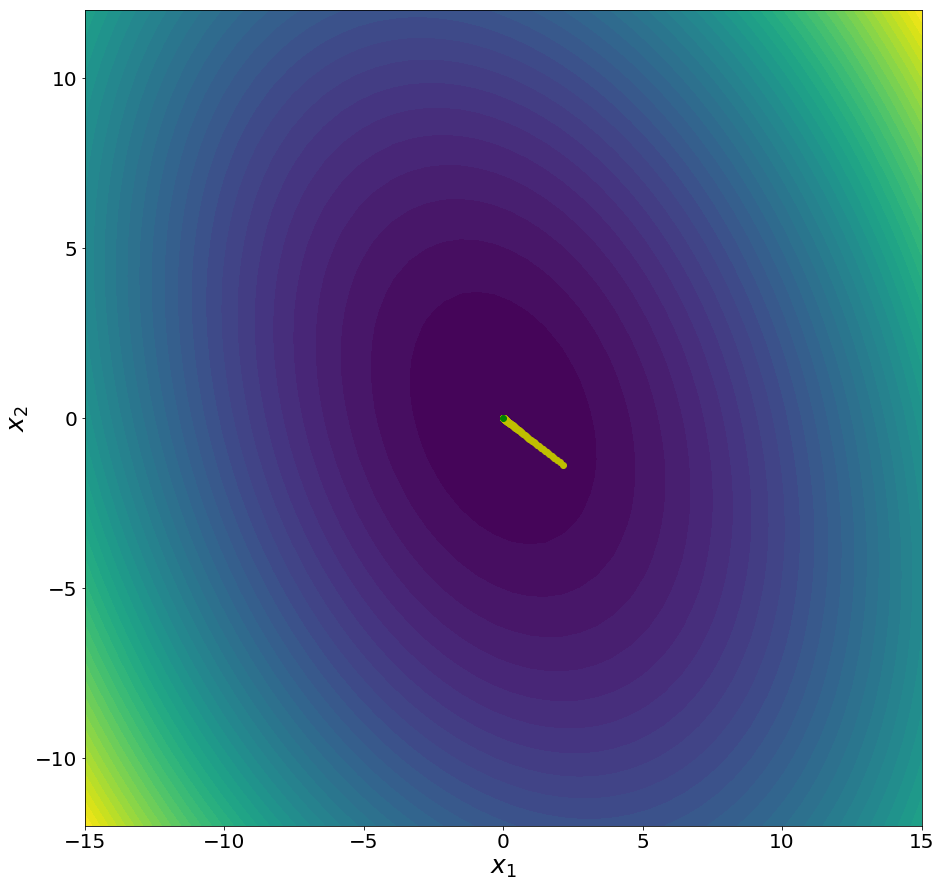

In [19]:
#p7


for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

HX ,HY  = 50,50 #number of x,y  points for countour
xmin,xmax = -15,15
ymin,ymax = -12,12
x1 = np.linspace(xmin,xmax,HX)
x2 = np.linspace(ymin,ymax,HY)
X1,X2 = np.meshgrid(x1,x2) # genertate mesh grid
w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
case2= ''
case = bowl #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2)# define equation
elif(case==case2):
    #define other surfaces here
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)
#compute hessian
hess11=sym.diff(j_grad1,w1)
hess12=sym.diff(j_grad1,w2)
hess21=sym.diff(j_grad2,w1)
hess22=sym.diff(j_grad2,w2)

#generate contour map
ConMap=np.zeros((HX,HY))
for i in range(HX):
    for k in range(HY):
        ConMap[i,k]=j.subs({w1:x1[i],w2:x2[k]})


sigma=1
mu=0
w=sigma*np.random.randn(2)+mu # starting point
wStar=[0,0] # ending point
ew=[]
jw=[]
eta = 0.05 # learning rate
lim=500 # number of iterations
count= 0 
line=[]
Ew_thresh=1e-2

while(True):
    #compute gradient matrix and hessian matrix
    g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])
    H= np.array([[float(hess11.subs({w1:w[0],w2:w[1]})),float(hess12.subs({w1:w[0],w2:w[1]}))],                 [float(hess21.subs({w1:w[0],w2:w[1]})),float(hess22.subs({w1:w[0],w2:w[1]}))]])
    
    wnew =  w-eta*(np.linalg.inv(H)@g) 
    #loop check
    if( count>lim ):
        print('Count Break')
        break
    elif(np.isnan(g).any()):
        print('nan break')
        break
    elif(np.linalg.norm(w-wStar)<Ew_thresh):
            print('Threshold break')
            break
    else:
        count=count +1
        wprev=w.copy()
        
        line.append(w)
        w=wnew.copy()
        
        ew.append(np.linalg.norm(w-wStar))
        jw.append(j.subs({w1:w[0],w2:w[1]}))
line=np.array(line)   

fig=plt.figure(figsize=(15,15))
plt.contourf(X1,X2,ConMap,50,cmap='viridis', linewidths=3,linestyles='solid')
plt.plot(line[:,1],line[:,0],color='y')
plt.scatter(line[:,1],line[:,0],color='y')
plt.plot(wStar[1],wStar[0],'go')
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show(fig)
# fig.savefig('p7.svg',format='svg')

Count Break


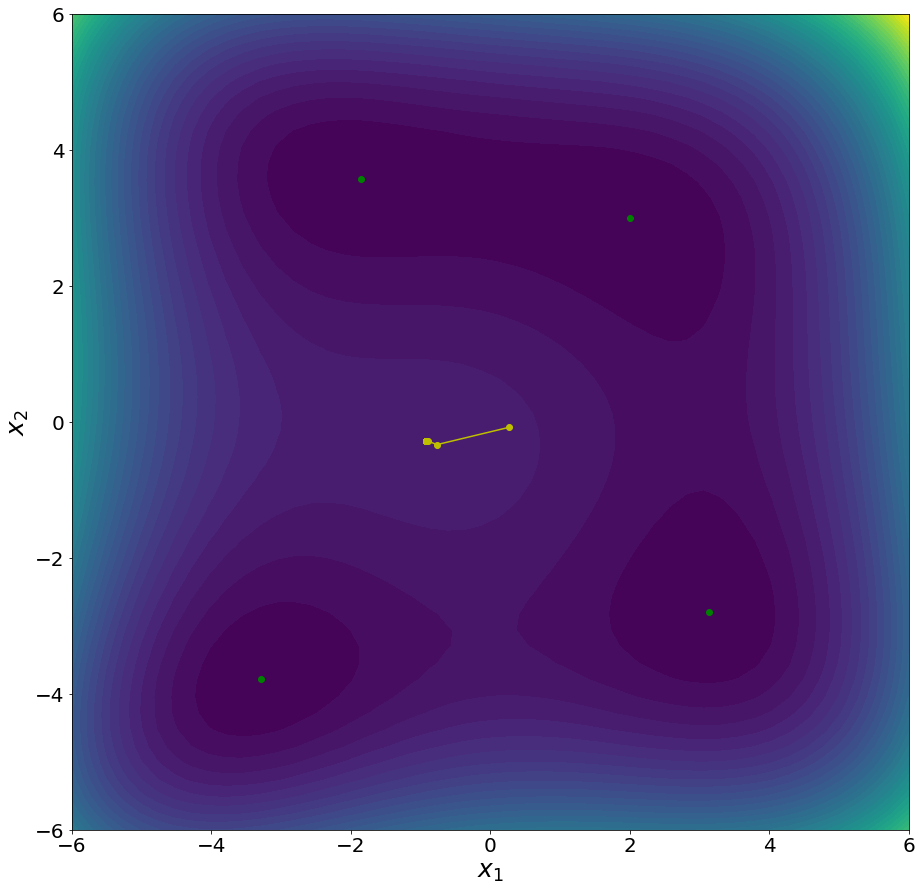

In [20]:
#p8


for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

HX ,HY  = 50,50 #number of x,y  points for countour
xmin,xmax = -6,6
ymin,ymax = -6,6
x1 = np.linspace(xmin,xmax,HX)
x2 = np.linspace(ymin,ymax,HY)
X1,X2 = np.meshgrid(x1,x2) # genertate mesh grid
w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
Rosenbrock= 'Rosenbrock'
Himmelblau= 'Himmelblau'
case = Himmelblau #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2) # define equation
elif(case==Rosenbrock):
    j=(1-w1)**2+100*(w2-w1**2)**2 # define equation
    pass
elif(case==Himmelblau):
    j=(w1**2+w2-11)**2+(w1+w2**2-7)**2 # define equation
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)
#compute hessian
hess11=sym.diff(j_grad1,w1)
hess12=sym.diff(j_grad1,w2)
hess21=sym.diff(j_grad2,w1)
hess22=sym.diff(j_grad2,w2)

#generate contour map
ConMap=np.zeros((HX,HY))
for i in range(HX):
    for k in range(HY):
        ConMap[i,k]=j.subs({w1:x1[i],w2:x2[k]})


sigma=1
mu=0
w=sigma*np.random.randn(2)+mu # starting point
wStar1=[3,2] # ending point
wStar2=[-2.8,3.13] # ending point
wStar3=[-3.78,-3.28] # ending point
wStar4=[3.58,-1.85] # ending point
ew=[]
jw=[]
eta = 0.9 # learning rate
lim=1000 # number of iterations
count= 0 
line=[]
Ew_thresh=1e-2

while(True):
    #compute gradient matrix and hessian matrix
    g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])
    H= np.array([[float(hess11.subs({w1:w[0],w2:w[1]})),float(hess12.subs({w1:w[0],w2:w[1]}))],                 [float(hess21.subs({w1:w[0],w2:w[1]})),float(hess22.subs({w1:w[0],w2:w[1]}))]])
    
    wnew =  w-eta*(np.linalg.inv(H)@g) 
    #loop check
    if( count>lim ):
        print('Count Break')
        break
    elif(np.isnan(g).any()):
        print('nan break')
        break
    elif(np.linalg.norm(w-wStar1)<Ew_thresh) or (np.linalg.norm(w-wStar2)<Ew_thresh) or (np.linalg.norm(w-wStar3)<Ew_thresh) or (np.linalg.norm(w-wStar4)<Ew_thresh):
        print('Threshold break')
        break
    else:
        count=count +1
        wprev=w.copy()
        
        line.append(w)
        w=wnew.copy()
        
#         ew.append(np.linalg.norm(w-wStar))
        jw.append(j.subs({w1:w[0],w2:w[1]}))
line=np.array(line)   

fig=plt.figure(figsize=(15,15))
plt.contourf(X1,X2,ConMap,50,cmap='viridis', linewidths=3,linestyles='solid')
plt.plot(line[:,1],line[:,0],color='y')
plt.scatter(line[:,1],line[:,0],color='y')
plt.plot(wStar1[1],wStar1[0],'go')
plt.plot(wStar2[1],wStar2[0],'go')
plt.plot(wStar3[1],wStar3[0],'go')
plt.plot(wStar4[1],wStar4[0],'go')
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show(fig)
# fig.savefig('p8.svg',format='svg')

Threshold break


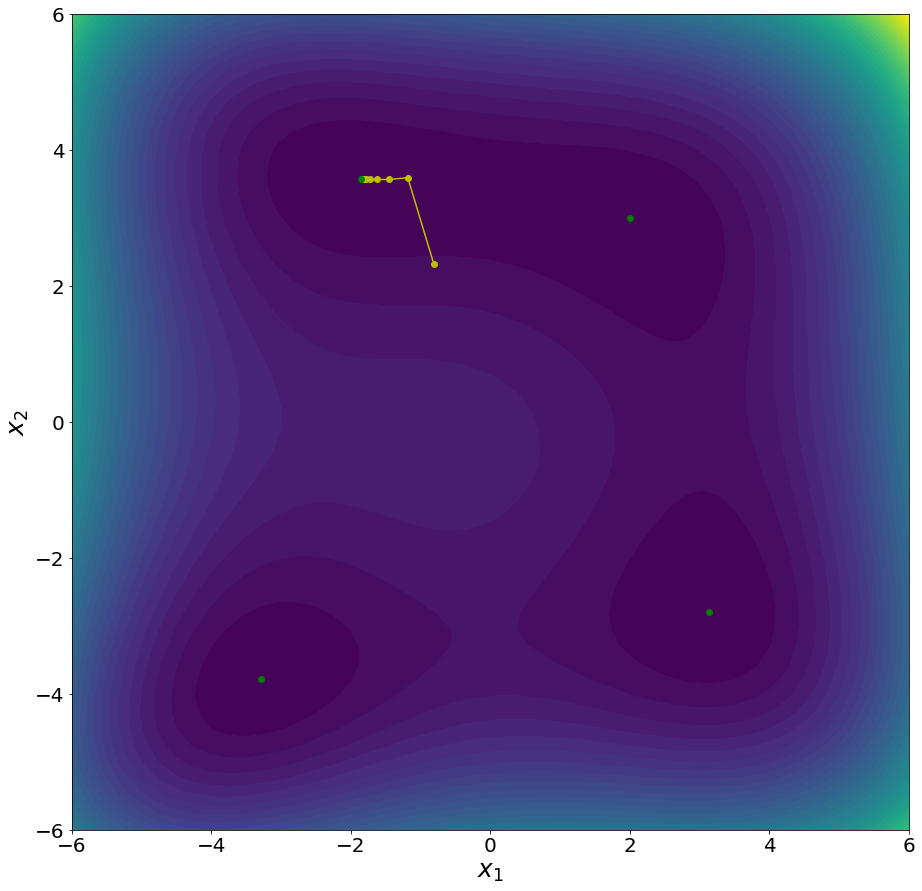

In [21]:
#p9


for name in dir():
    del globals()[name]
    
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

HX ,HY  = 50,50 #number of x,y  points for countour
xmin,xmax = -6,6
ymin,ymax = -6,6
x1 = np.linspace(xmin,xmax,HX)
x2 = np.linspace(ymin,ymax,HY)
X1,X2 = np.meshgrid(x1,x2) # genertate mesh grid
w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')


bowl = 'bowl'
Rosenbrock= 'Rosenbrock'
Himmelblau= 'Himmelblau'
case = Himmelblau #case select
if(case==bowl):
    j=(w1**2+w1*w2+3*w2**2) # define equation
elif(case==Rosenbrock):
    j=(1-w1)**2+100*(w2-w1**2)**2 # define equation
    pass
elif(case==Himmelblau):
    j=(w1**2+w2-11)**2+(w1+w2**2-7)**2 # define equation
    pass
else:
    print('case not recognized')
    

#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)
#compute hessian
hess11=sym.diff(j_grad1,w1)
hess12=sym.diff(j_grad1,w2)
hess21=sym.diff(j_grad2,w1)
hess22=sym.diff(j_grad2,w2)

#generate contour map
ConMap=np.zeros((HX,HY))
for i in range(HX):
    for k in range(HY):
        ConMap[i,k]=j.subs({w1:x1[i],w2:x2[k]})


sigma=1
mu=0
w=sigma*np.random.randn(2)+mu # starting point
wStar1=[3,2] # ending point
wStar2=[-2.8,3.13] # ending point
wStar3=[-3.78,-3.28] # ending point
wStar4=[3.58,-1.85] # ending point
ew=[]
jw=[]
eta = 0.9 # learning rate
lim=4000 # number of iterations
count= 0 
line=[]
Ew_thresh=1e-2
Lambda=30

while(True):
    #compute gradient matrix and hessian matrix
    g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])
    H= np.array([[float(hess11.subs({w1:w[0],w2:w[1]})),float(hess12.subs({w1:w[0],w2:w[1]}))],                 [float(hess21.subs({w1:w[0],w2:w[1]})),float(hess22.subs({w1:w[0],w2:w[1]}))]])
    
    wnew =  w-eta*(np.linalg.inv(H+Lambda*np.eye(H.shape[0], dtype=int))@g) 
    #loop check
    if( count>lim ):
        print('Count Break')
        break
    elif(np.isnan(g).any()):
        print('nan break')
        break
    elif(np.linalg.norm(w-wStar1)<Ew_thresh) or (np.linalg.norm(w-wStar2)<Ew_thresh) or (np.linalg.norm(w-wStar3)<Ew_thresh) or (np.linalg.norm(w-wStar4)<Ew_thresh):
        print('Threshold break')
        break
    else:
        count=count +1
        wprev=w.copy()
        
        line.append(w)
        w=wnew.copy()
        
#         ew.append(np.linalg.norm(w-wStar))
        jw.append(j.subs({w1:w[0],w2:w[1]}))
line=np.array(line)   

fig=plt.figure(figsize=(15,15))
plt.contourf(X1,X2,ConMap,50,cmap='viridis', linewidths=3,linestyles='solid')
plt.plot(line[:,1],line[:,0],color='y')
plt.scatter(line[:,1],line[:,0],color='y')
plt.plot(wStar1[1],wStar1[0],'go')
plt.plot(wStar2[1],wStar2[0],'go')
plt.plot(wStar3[1],wStar3[0],'go')
plt.plot(wStar4[1],wStar4[0],'go')
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show(fig)
# fig.savefig('p9.svg',format='svg')